# **Machine Learning Proyecto Final**
## DataSet = Cancer de Mama
### Ian Doshner Galland 0219008


Codigo Realizado y probado en Google Colab

-------------------
## **Problema:**
--------------------
En el campo de la medicina, la detección temprana y precisa del cáncer es fundamental para mejorar los resultados de los pacientes. En este proyecto, nos enfocamos en aprovechar el poder de los modelos supervisados y un amplio conjunto de datos para predecir si una muestra de cáncer es maligna o benigna. Utilizamos un dataset completo y bien estructurado, que contiene información relevante sobre características y diagnósticos de muestras de cáncer.


---------------------------
## **Objetivo:**
----------------------------
Nuestro objetivo principal es desarrollar varios modelo de aprendizaje automático que puedan aprender patrones y relaciones a partir de los datos existentes, y utilizar ese conocimiento para realizar predicciones precisas y confiables sobre la naturaleza del cáncer.

*   Detectar y limpiar anomalias en los datos
*   Emplear diferentes modelos de aprendizaje
*   Mejorar los existentes modelos y buscar el mejor
*   Realizar predicciones
*   Analizar los resultados y las predicciones
*   Generar conclusiones para la toma de decisiones.


---------------------------------
## **Data Description Cancer de Mama:**
---------------------------------
**La media de los datos**

1.   diagnosis : El diagnosis del cancer, maligno o benigno
2.   radius_mean : La media del radio
3.   texture_mean : La media de la textura
4.   perimeter_mean : La media del perimetro
5.   area_mean : La media del area
6.   smoothness_mean : La media de la suavidad
7.   compactness_mean : La media de la compacidad
8.   concavity_mean : La media de la concavidad
9.   concave points_mean : La media de los puntos de concavidad
10.  symmetry_mean : La media de la simetria
11.  fractal_dimension_mean : La media de la dimension fractal
**Estos parecen ser el error estandar de los datos**
12.  radius_se : Radio de la muestra
13.  texture_se : desviación estándar de los valores de la escala de grises
14.  perimeter_se : Perimetro de la muestra
15.  area_se : area de la muestra
16.  smoothness_se : variación local en longitudes de radio o suavidad
17.  compactness_se : perimeter² / area — 1.0
18.  concavity_se : severidad de las porciones cóncavas del contorno
19.  concave points_se : número de porciones cóncavas del contorno
20.  symmetry_se : Simetria pero no estoy seguro
21.  fractal_dimension_se : No estoy seguro
**No estoy seguro que significan pero por el nombre puedo especular que es el peor caso posible o son los valores peores.**
22.  radius_worst
23.  texture_worst
24.  perimeter_worst
25.  area_worst
26.  smoothness_worst
27.  compactness_worst
28.  concavity_worst
29.  concave points_worst
30.  symmetry_worst
31.  fractal_dimension_worst
32.  Unnamed : Posible error de pandas


---------------------------------
## **Estructura de Notebook:**
---------------------------------

1.   Carga de Archivo y analisis inicial de los datos
2.   Limpieza, armado de hipotesis y normalizacion de variables.
3.   Creacion y analisis de Modelos
4.   Conclusiones

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Librerias
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors

import seaborn as sns

# Método para escalar variables
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Algoritmos
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn import manifold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Métricas para evaluar modelos
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
#Mas metricas para ver la calidad del modelo
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
# Para afinar los modelos
from sklearn.model_selection import GridSearchCV

#Cosas Para redes neuronales
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping


#Graficar
from pandas.plotting import scatter_matrix
from scipy.stats import gaussian_kde
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
from plotnine import ggplot, aes, geom_boxplot, geom_point
import pydotplus
from IPython.display import Image

# Importing the SHAP library
import shap as sh

#Modelos para regresion
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# Ignorar mensajes
#import warnings
#warnings.filterwarnings("ignore")

#from google.colab import drive
#drive.mount('/content/drive')

# 1. Carga de Archivo y analisis inicial de los datos

In [ ]:
# Lee archivo
urlCan = "https://raw.githubusercontent.com/FoxuF/DataSetsMachineLearning/main/DataSets/Cancer_de_mama.csv"
dfCamOG = pd.read_csv(urlCan)
dfCam = pd.read_csv(urlCan)


Después de importar un conjunto de datos, es importante tener una idea general de cómo se compone en términos de formato, filas (observaciones) y columnas (variables). Para ello, los siguientes atributos y métodos resultan útiles:


*   `DataFrame.shape`: Imprime dimensiones de un dataframe en una tupla (total de filas, total de columnas).
* `DataFrame.columns`: Devuelve nombres de columnas de un dataframe.
*   `DataFrame.info()`: Imprime información sobre un dataframe, incluido el tipo de índice y las columnas, los valores no nulos y el uso de la memoria.
*   `DataFrame.describe()`: Devuelve estadísticas descriptivas de un dataframe, incluyendo aquellas que resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo los valores de NaN.Analiza series numéricas y de objetos, así como conjuntos de columnas DataFrame de tipos de datos mixtos.
* `DataFrame.head()`: Devuelve las primeras n filas de un dataframe. Es útil para probar rápidamente si un dataframe tiene el tipo correcto de datos.
* `DataFrame.tail()`: Devuelve las últimas n filas de un dataframe. Es útil para verificar datos rápidamente, por ejemplo, después de ordenar o agregar filas.
* `unique()`: Devuelve los elementos únicos ordenados de un arreglo.



In [ ]:
print(f"DataFrame Cancer de Mama tiene {dfCam.shape[0]} filas y {dfCam.shape[1]} columnas." )

DataFrame Cancer de Mama tiene 569 filas y 33 columnas.


In [ ]:
dfCam.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
dfCam.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [ ]:
dfCam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Por ahora la base parece venir limpia, con excepcion de la columna 32 que parece ser un error al momento de transformar los datos en un dataset y solo contiene nulos por lo tanto borraremos la columna 32 "Unnamed".
Aprovechando tambien eliminaremos la columna de "id" ya que no nos aporta nada util.

In [ ]:
# Función que remueve espacios del inicio y el final en columnas de cadenas de caracteres
def leading_space_remover(dataframe):
    for i in dataframe.columns:
        if dataframe[i].dtype == "object":
            dataframe[i] = dataframe[i].map(str.strip)

In [ ]:
# Remueve espacios en columnas de cadenas de caracteres de nuestro dataframe
leading_space_remover(dfCam)

In [ ]:
#Ahora removemos los espacios en medio de algunas columnas por comodidad
dfCam.rename(columns = {'concave points_mean':'concave_points_mean'}, inplace = True)
dfCam.rename(columns = {'concave points_se':'concave_points_se'}, inplace = True)
dfCam.rename(columns = {'concave points_worst':'concave_points_worst'}, inplace = True)

In [ ]:
dfCam = dfCam.drop(columns=['Unnamed: 32'])
dfCam = dfCam.drop(columns=['id'])

In [ ]:
# Creando lista de columnas numéricas
num_cols = ['radius_mean','perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
            'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se','texture_se','perimeter_se','area_se',
            'smoothness_se','compactness_se','concavity_se', 'concave_points_se', 'symmetry_se',
            'fractal_dimension_se', 'radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst',
            'compactness_worst','concavity_worst','concave_points_worst','symmetry_worst','fractal_dimension_worst']
# Creando lista de columnas no numéricas
cat_cols = ['diagnosis']

In [ ]:
dfCam.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave_points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave_points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave_points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

Por ahora lo unico interesante que podemos extraer de los datos es que todo parece estar correcto, solo hay 2 diagnosis, maligno y benigno. Los demas valores puede que tengan duplicados pero se puede dar y no nos afecta.

In [ ]:
dfCam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
# Estadisticas de columnas categoricas
dfCam["diagnosis"].describe().T

count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object

B    357
M    212
Name: diagnosis, dtype: int64


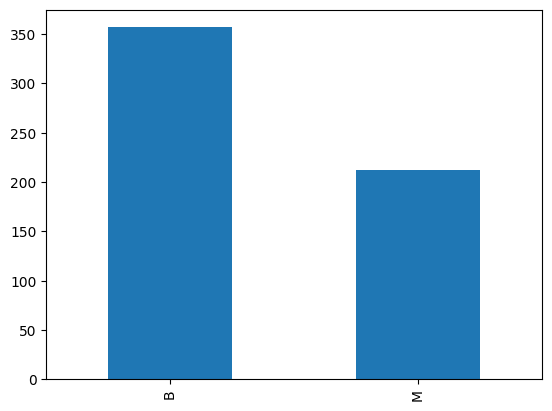

In [ ]:
#Veamos la comparasion entre Benignos y malignos graficamente
dfCam['diagnosis'].value_counts().plot(kind='bar')
print(dfCam['diagnosis'].value_counts())
plt.show()


In [ ]:
# Estadísticas de columnas numericas
dfCam.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Sospecho que los datos no estan normalizados, por el nombre de las columnas puedo suponer que el perimetro, area, esta en una metrica como centimetros o milimetros, pero desconozco que metrica se usa para medir la suavidad de una muestra. Quitando mi opinion podemos observar la diferencia de los datos, por ejemplo veamos las columnas de area "area_mean" tiene un maximo de 2501, "area_worst" tiene un maximo de 4254. Ahora veamos otra columna de la suavidad como "smoothness_mean" tiene un valor maximo de 0.163, "smoothness_worst" tiene 0.222. Son valores sumamente diferentes. Por lo tanto tenemos que normalizar.


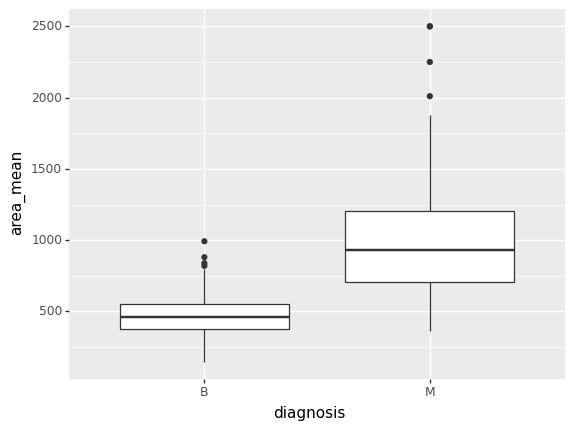

<ggplot: (8761090387533)>

In [ ]:
# Crea un gráfico de cajas que muestra
# el diagnosis en el eje x
# y el valor del area
ggplot(dfCam) + aes(x="diagnosis", y="area_mean") + geom_boxplot()


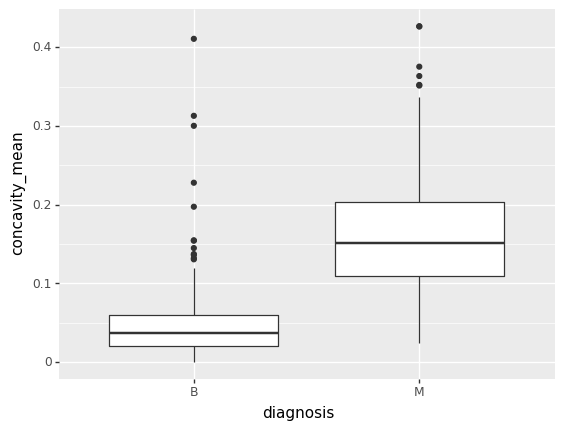

<ggplot: (8761090210540)>

In [ ]:
ggplot(dfCam) + aes(x="diagnosis", y="concavity_mean") + geom_boxplot()

La grafica no es la mejor pero aun asi podemos ver que la mayoria de las muestras benignas son mas chicas que las malignas al igual con la concavidad, las celulas malignas tienden a tener  mas concavidad. Estos pueden ser datos importantes o "outliers"

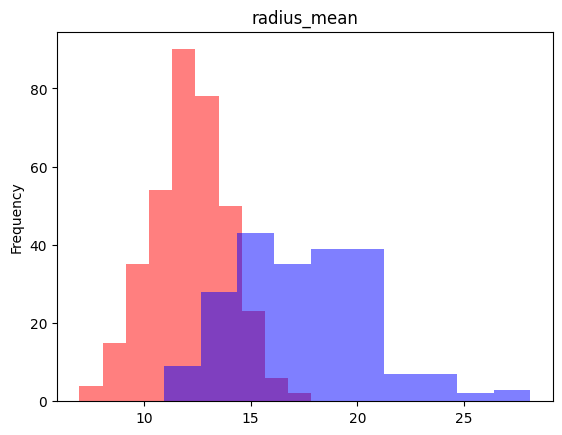

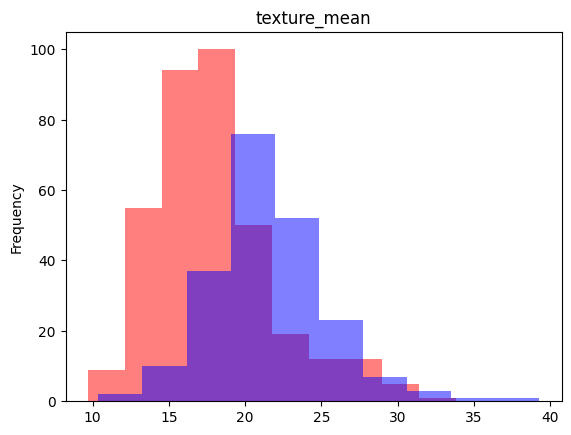

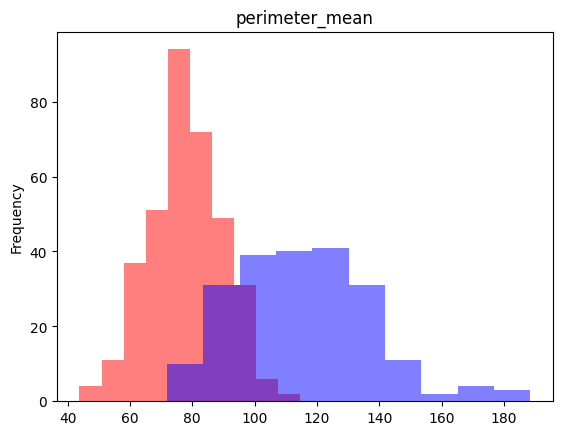

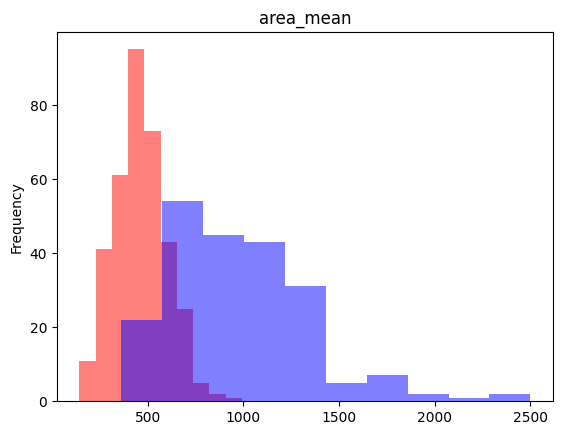

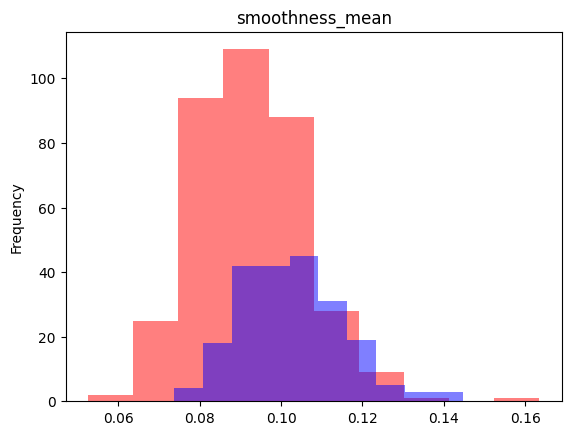

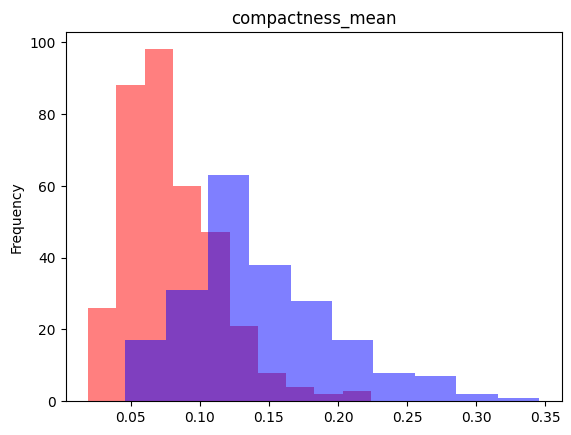

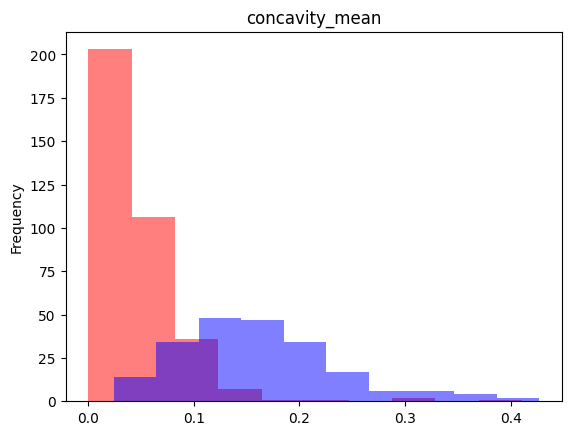

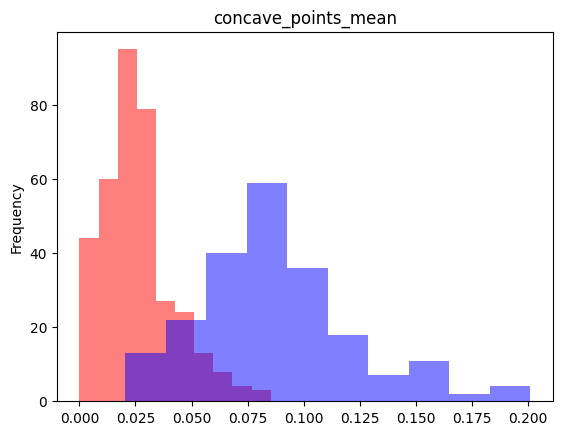

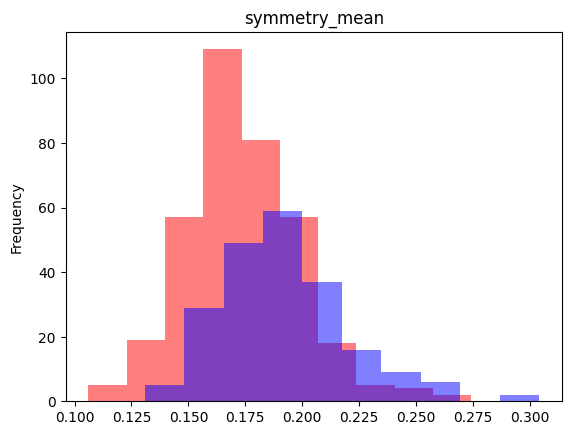

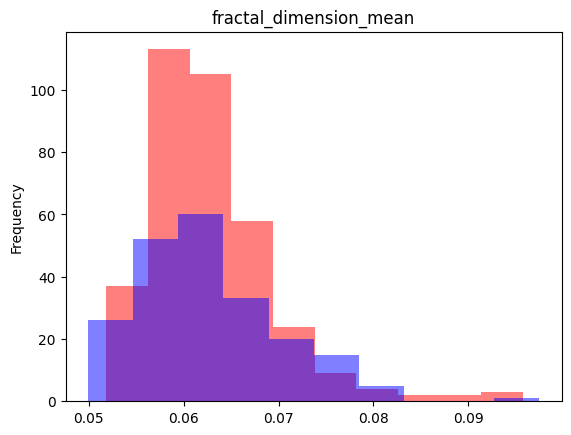

In [ ]:
for i in ('radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
          'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean' ):
  plt.figure()
  dfCam[i][dfCam['diagnosis'] == 'B'].plot.hist(alpha = 0.5, color = 'red', title = i)
  dfCam[i][dfCam['diagnosis'] == 'M'].plot.hist(alpha = 0.5, color = 'blue')

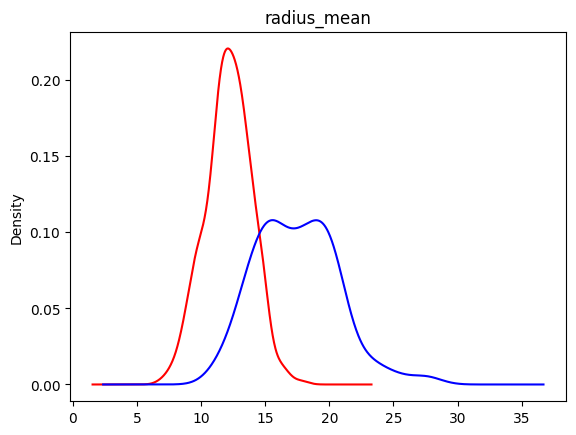

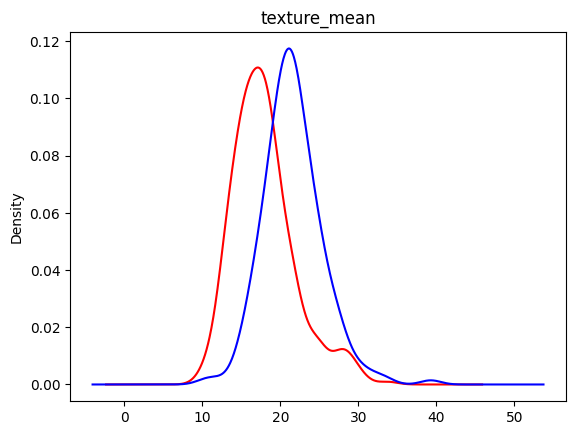

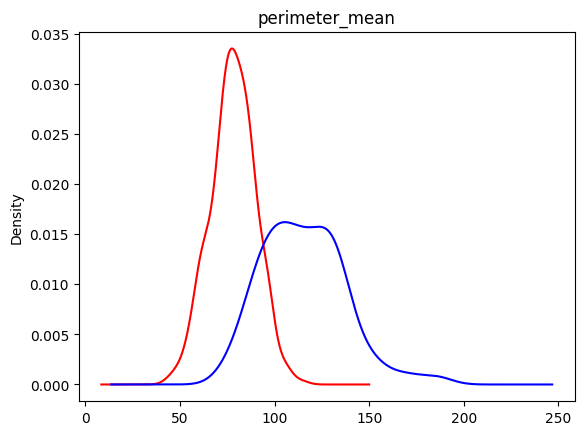

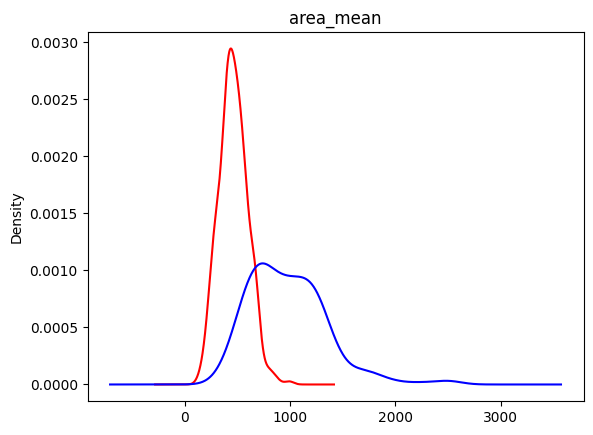

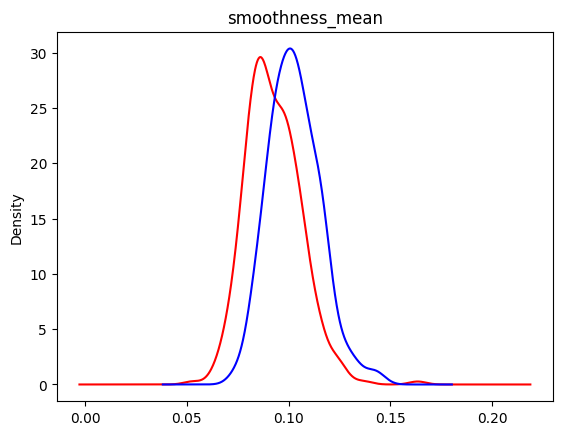

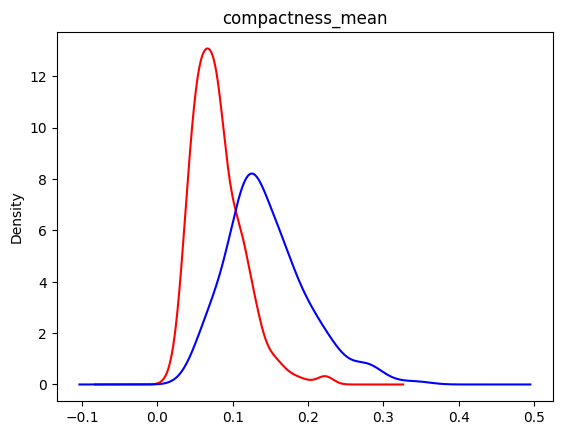

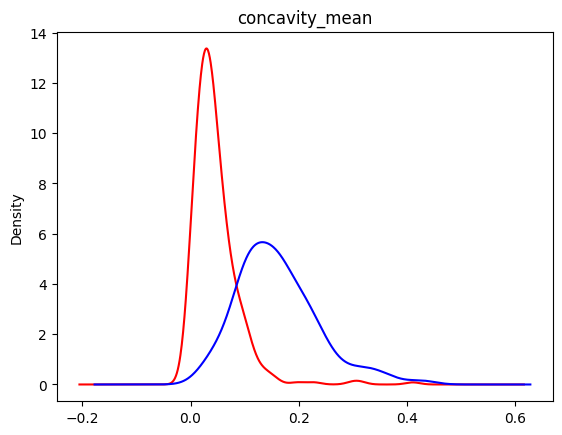

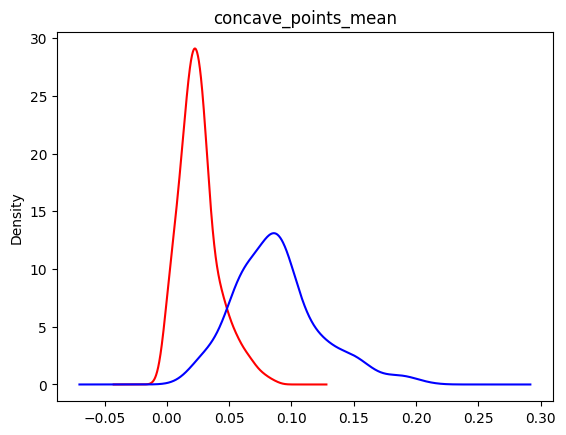

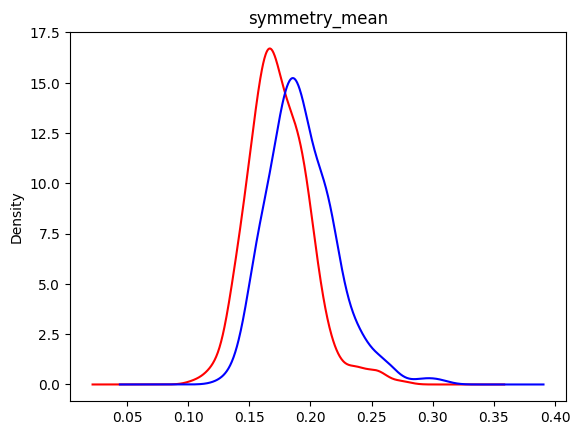

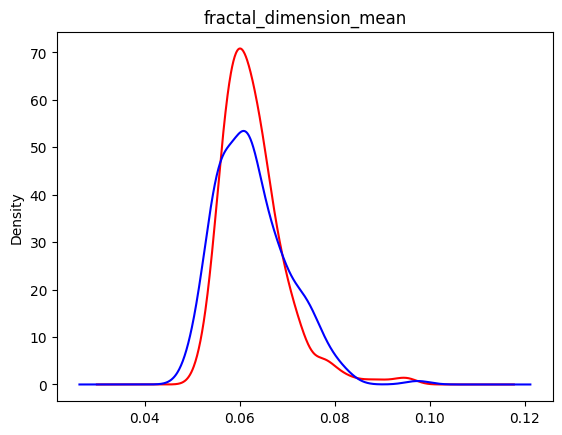

In [ ]:
for i in ('radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
          'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean' ):
  plt.figure()
  dfCam[i][dfCam['diagnosis'] == 'B'].plot.kde(color = 'red', title = i)
  dfCam[i][dfCam['diagnosis'] == 'M'].plot.kde(color = 'blue', title = i)


Gracias al histograma y a estas graficas podemos ver que contamos con menos datos azules (Malignos) que rojos (benignos) Mi sospecha sobre la normalizacion se puede comprobar con esto. Los modelos necesitan una distribucion normal de datos por lo que tenemos que ver que datos son los que nos afectan.

In [ ]:
plt.figure(figsize=(14, 14))
sns.pairplot(dfCam, diag_kind='kde');

<Figure size 1400x1400 with 0 Axes>

Podemos observar que existen relaciones lineales en con el radio, los puntos de concavidad y demas. Tambien hay relaciones exponenciales entre el radio y la dimension fractal, imagino que por que el radio se usa para calcular el area y el perimetro.

<img src="https://media.giphy.com/media/xT9C25UNTwfZuk85WP/giphy-downsized-large.gif">

Ahora que tenemos una vision general del conjunto usaremos empezaremos a entrar en la segunda etapa de la estadistica descripiva para describir y resumir cuantitativamente esta cantidad de datos. Es decir, no sacaremos conclusiones mas alla de los datos que estamos analizando haciendo uso de una poblacion (Coleccion de objetos) y una muestra (Parte de la observacion que observaremos).
Las dos etapas principales del analisis cuantitativo de datos:

1.   **Preprocesamiento de datos**: Preparamos los datos
2.   **Analisis**: Describimos, evaluamos y resumimos los datos para poder visualizarlos.

Nosotros ya realizamos ejemplos del preprocesamiento ahora seguiremos con el analisis.

Ya que analizaremos una variable categorica conviene hacer tablas de frecuencias, ya que es el mejor tipo de exploracion no grafica para el analisis de datos.


# 2. Limpieza, armado de hipotesis y normalizacion de variables.

**Valores nulos o faltantes**

Cuando nos enfrentamos con valores faltantes, lo primero que debemos hacer es identificar si existe algún patrón o recurrencia. Esto determinará cuál de las siguientes posibles acciones podría ser la más conveniente en tomar:

* Predicción
* Sustitución por media, mediana o moda
* Interpolación
* Imputación

In [ ]:
# Comprobando que no hay valores nulos
dfCam.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
# Ejecuta máscara sobre valores faltantes en dataframe df
pd.isna(dfCam)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Podemos observar que nuestro conjunto esta libre de Nulos o NA. Esto nos permite trabajar con el sin preocupaciones.

Estos son ejemplos de analisis exploratorios que se pueden hacer para sacar conclusiones o armar Hipotesis de los resultados.
Por ejemplo yo sospecho que el dato del area_mean influira fuertemente en si es maligno o benigno, estoy sospechando que tiene una correlacion fuerte en el diagnosis. Asi que exploremos si es cierto

¿Cual es la distribucion de muestras por diagnosis?

In [ ]:
# Devuelve distribución de muestras por diagnosis
dfCam.groupby("diagnosis").size()/len(dfCam)*100

diagnosis
B    62.741652
M    37.258348
dtype: float64

¿Que porcentaje de las muestras malignas tienen un area media mayor a 500?

In [ ]:
# Selecciona malignos
dfCam_m = dfCam[dfCam.diagnosis == "M"]

# Selecciona malignos con un area_mean mayor a los 500
dfCam_m500 = dfCam_m [dfCam_m.area_mean >= 500]

# Guarda porcentaje de los malignos con un area_mean mayor a los 500
pct_m_500 = round(len(dfCam_m500)/len(dfCam_m)*100)

print("{0}% de las muestras malignas tiene un area media mayor a los 500.".format(pct_m_500))


95% de las muestras malignas tiene un area media mayor a los 500.


¿Que porcentaje de las muestras benignas tienen un area media mayor a 500?

In [ ]:
# Selecciona Benignos
dfCam_B = dfCam[dfCam.diagnosis == "B"]

# Selecciona Benignos con un area_mean mayor a los 500
dfCam_B500 = dfCam_B [dfCam_B.area_mean >= 500]

# Guarda porcentaje de los Benignos con un area_mean mayor a los 500
pct_b_500 = round(len(dfCam_B500)/len(dfCam_B)*100)

print("{0}% de las muestras Benignas tiene un area media mayor a los 500.".format(pct_b_500))

38% de las muestras Benignas tiene un area media mayor a los 500.


Esto ya esta comprobando que lo que sospechaba puede ser cierto, si aumenta el valor del area es mas posible que sea maligno que benigno

Este conjunto de datos tiene la ventaja de que tiene la media de las muestras como columnas, esto es una ventaja ya que una de las primeras medidas que se usa para observar los datos es la media de la muestra.
**Dada una muestra de $n$ valores, ${x_i}$, $i=1$, ..., $n$, la media, $\mu$, es la suma de los valores dividida por el número de valores**, esto se representa de la siguiente manera:
$\mu = \frac{1}{n} + \sum \limits _{i=1} ^{n} x_{i}$

Podriamos seguir analizando con la media o con el promedio ya que a menudo se usan indistintamente. La unica diferencia entre los dos es que la media es el resumen estadistico de una muestra y el promedio es una forma para describir la tendencia central de una muestra.
Mas adelante despues de realizar todos los modelos probare eliminando las columnas de los demas datos dejando solo la media para ver si tiene alguna mejora el modelo.

**Varianza y Desviacion Estandar**
La varianza y la desviacion estandar me ayudaran con este conjunto de datos en particular ya que estare trabajando mucho con la media y estos complementan a la media.
**La varianza $\sigma^2$ describe la dispersión de los datos** y se define de la siguiente manera: $\sigma^{2} = \frac{1}{n}\sum_{i=1}^{n}(x_{i}-\mu)^{2}$

**La Desviacion Estandar** no es mas que la raiz cuadrada de la varianza $\sigma$
En este caso utilizare la desviacion estandar mas que la varianza ya que la varianza tiene complicaciones al interpretarse (por ejemplo si estamos trabajando con gramos la varianza estaria en gramos al cuadrado), en este caso no se si usamos cm, mm o lo que sea.

¿Cual es la media, varianza y desviacion estandar del area de las muestras malignas?

In [ ]:
#La media la tenemos en la columna area_mean, pero para no sacar la media de la media usare la columna de Smoothness_se
# Guarda la media del area de las muestras malignas
m_area_m = round(dfCam_m.area_se.mean())
print("La media del area de las muestras malignas es {0}. ".format(m_area_m))

La media del area de las muestras malignas es 73. 


In [ ]:
# Guarda la varianza del area de las muestras malignas
var_area_m = round(dfCam_m.area_se.var())

print("La varianza del area de las muestras malignas es {0}. ".format(var_area_m))

La varianza del area de las muestras malignas es 3764. 


In [ ]:
#Guarda la desviacion estandar del area de las muestras malignas
std_area_m = round(dfCam_m.area_se.std())

print("La desviación estándar del area de las muestras malignas es {0}.".format(std_area_m))

La desviación estándar del area de las muestras malignas es 61.


Ahora hay otro descriptor que se puede usar en el analisis y este es la **Mediana**, aunque la media generalmente baste podemos toparnos con un problema y este es: ¿Que pasa cuando en el conjunto de datos hay una diferencia entre valores muy grande? Por ejemplo en el area, que pasaria si generalmente las muestras son de 100-500 y ahora hubiera valores de 5000. Estos datos se les considera ***VALORES ATIPICOS*** la media, $\mu$, cambiará drásticamente hacia el valor atípico.

Una solución a este inconveniente la ofrece la mediana, $\mu_{1/2}$, una estadística de orden que da el valor medio de una muestra. En este caso, todos los valores están ordenados por su magnitud y la mediana es el valor que esta en el medio de todos los valores. La media es un valor mas robusto frente a valores atipicos.

¿Cuál es la Area media y la Area mediana?

In [ ]:
# Guarda Area media
mu_area = round(dfCam.area_se.mean())

# Guarda Area mediana
med_area = round(dfCam.area_se.median())

print("La Area media es de {0}.".format(mu_area))
print("La Area mediana es de {0}.".format(med_area))

La Area media es de 40.
La Area mediana es de 25.


Podemos ver que si hay una diferencia, quiza no la mas grande pero la hay

Estas observaciones apoyan pero solo observar las medias, varianzas, desviaciones y medianas puede causar problemas, las mismas estadisticas pueden describir datos muy diferentes.
Esto nos lleva a validar nuestros datos inspeccionandolos a partir de una distribucion de datos, esta describe con que frecuencia aparece cada valor.

**La representación más común de una distribución es un histograma**, que muestra gráficamente lo siguiente:

* Centro (es decir, la ubicación) de los datos
* Dispersión (es decir, la escala) de los datos
* Asimetría de los datos
* Presencia de valores atípicos
* Presencia de múltiples modas en los datos

In [ ]:
# Creando histogramas
dfCam.hist(figsize = (14, 14))
plt.show()

¿Cómo se distribuyen las areas de los Malignos y de los Benignos respectivamente en 20 particiones?

In [ ]:
# Grafica distribución de las areas de los malignos
dfCam_m.area_se.hist(bins=20, alpha=0.5, color="blue")

# Grafica distribución de las areas de los benignos
dfCam_B.area_se.hist(bins=20, alpha=0.5, color="red")

Como lo habia mencionado anteriormente los datos no parecen estar normalizado, por lo que los normalizaremos temporalmente con el histograma. Para estoy hay 2 formas de hacerlo


1.   **Dividir la frecuencia de observaciones en una particion entre el total de observaciones**. Podemos decir que las frecuencias relativas suman 1. Esto significa que la altura de la barra del histograma representa la proporcion de los datos en cada particion
2.   **Dividir la frecuencia de observaciones en una particion entre el total de observaciones por el ancho de la particion** En pocas palabras veremos el integral bajo el histograma con valor de 1. Haciendo esto tendremos un histograma relativo parecido a la **funcion de masa de probabilidad** ***(PMF)***



¿Cómo se distribuyen las areas de los Malignos y de los Benignos respectivamente en 20 particiones? Con normalizacion

In [ ]:
# Grafica distribución de las areas de los malignos
dfCam_m.area_se.hist(bins=20, alpha=0.5, color="blue", density=True)

# Grafica distribución de las areas de los benignos
dfCam_B.area_se.hist(bins=20, alpha=0.5, color="red", density=True)

Ahora demostramos con lo siguiente que la integral de la funcion de masa de probabilidad del area de los malignos es igual a 1.

In [ ]:
counts, bins = np.histogram(dfCam_m.area_se, bins=20)
density = counts/(sum(counts)*np.diff(bins))
np.sum(density*np.diff(bins)) == 1

**La función de distribución acumulativa (abreviada CDF en inglés) describe la probabilidad de que una variable continua aleatoria $X$ con una distribución de probabilidad dada, tenga un valor menor o igual que $x$**.

De forma normalizada y acumulativa
¿Como se distribuyen las areas de los malignos y los benignos?

In [ ]:
# Grafica distribución de las areas de los malignos
dfCam_m["area_se"].hist(bins=20, linewidth=2, color="blue", density=True, cumulative=True, histtype="step")

# Grafica distribución de las areas de los benignos
dfCam_B["area_se"].hist(bins=20, linewidth=2, color="red", density=True, cumulative=True, histtype="step")

Podemos ver que hay una tendencia muy fuerte entre el diangosis de un cancer maligno con el area del cancer. Es muy probable que si el cancer pasa de 80 sea clasificado como maligno.

**Manejo de los valores atipicos**
Como habia mencionado previamente los valores atipicos son vlalores que estan lejos de la tendencia.
Hay varias reglas para detectar los valores atipicos. Una de las reglas mas comunes es definir los valores atipicos como valors que se pasan de la media en 2 o 3 desviaciones estandar.
Veamos como se comporta el area en cuanto a los valores


Veamos la diferencia entre datos sin normalizar y normalizados

In [ ]:
#Datos con valores atipicos
#Cuál es la area mínima, máxima y media de las muestras con un area mayor a 50?
dfcam50 = dfCam[dfCam.area_se >= 50]
#Minima
min_area_50 = round(dfcam50.area_se.min())
#Maxima
max_area_50 = round(dfcam50.area_se.max())
#Media
mu_area_50 = round(dfcam50.area_se.mean())

print("Area Minima de las muestas es de {0}".format(min_area_50))
print("Area Maxima de las muestas es de {0}".format(max_area_50))
print("Area Media de las muestas es de {0}".format(mu_area_50))


In [ ]:
#Desviacion estandar de las areas mayores a 500
std_area_50 = round(dfcam50.area_se.std())
print("Desviacion estandar de las areas mayores a 50 es de {0}. ".format(std_area_50))

In [ ]:
#Selecciona muestras con un area mayor a los 500 sin valores atipicos.
dfcam_50_c = dfcam50[(dfcam50.area_se >= (mu_area_50-std_area_50*2)) & (dfcam50.area_se <= (mu_area_50+std_area_50*2))]

In [ ]:
#Datos sin valores atipicos
#Cuál es la area mínima, máxima y media de las muestras con un area mayor a 500?
#Minima
min_area_50_c = round(dfcam_50_c.area_se.min())
#Maxima
max_area_50_c = round(dfcam_50_c.area_se.max())
#Media
mu_area_50_c = round(dfcam_50_c.area_se.mean())

print("Area Minima de las muestas es de {0}".format(min_area_50_c))
print("Area Maxima de las muestas es de {0}".format(max_area_50_c))
print("Area Media de las muestas es de {0}".format(mu_area_50_c))

In [ ]:
# Función que calcula el grado de asimetría de una muestra
def skewness(X):
  X = np.array(X)

  mu = X.mean()
  std = X.std()

  g1 = sum((X-mu)**3)/(len(X)*(std**3))

  return g1

In [ ]:
#Grado de asimetria de las areas de las celulas malignas con area mayores de 50 sin valores atipicos
skewness(np.array(dfcam_50_c[dfcam_50_c.diagnosis == "M"].area_mean))

In [ ]:
#Grado de asimetria de las areas de las celulas benignas con area mayores de 50 sin valores atipicos
skewness(np.array(dfcam_50_c[dfcam_50_c.diagnosis == "B"].area_mean))

Podemos observar que dentro de la misma area no hay valores atipicos ya que los valores son practicamente los mismos cuando dividimos la muestra, pero si se pueden considerar valores atipicos si son comparados con los otros valores de las columnas

### Búsqueda de correlaciones
El coeficiente de **correlación de Pearson o R de Pearson, es un medida de la correlación lineal entre dos conjuntos de datos**. Es el cociente entre la covarianza de dos variables y el producto de sus desviaciones estándar; por lo tanto, es esencialmente una medida normalizada de la covarianza, de modo que **el resultado siempre tiene un valor entre −1 y 1**. Al igual que con la propia covarianza, la medida **solo puede reflejar una correlación lineal de variables** e ignora muchos otros tipos de relaciones.
Dado que el conjunto de datos no es demasiado grande, podemos calcular fácilmente el coeficiente de correlación estándar (también llamado R de Pearson) entre cada par de variables usando el método `corr()`.
La **matriz de correlación** de $n$ variables aleatorias continuas $X_1...X_n$ es una matriz $n*n$ cuya entrada $(i,j)$ es $corr(X_i,X_j)$. Así, las entradas diagonales son todas idénticas.

<img src="https://media.giphy.com/media/l0IylOPCNkiqOgMyA/giphy.gif">

In [ ]:
# Calcula matriz de correlación
corr_matrix = dfCam.corr()

In [ ]:
# Grafica matriz de correlación en mapa de calor
sns.heatmap(corr_matrix, square=True, linewidths=0.5)

Podemos ver un patron en las correlaciones, sospecho que se repiten, esto debe ser por que las columnas son el mismo valor representado de distintas maneras, los que terminan con _mean son la media, los _se pueden ser el error y los _worst los peores, por ahora dejaremos el conjunto de datos asi. Temporalemnte copiare los datos en otro dataframe y solo dejare la media de los datos. Esto lo hare para ver si afecta de manera positiva a mi modelo quitarle los _se y los _worst.
Pero el analisis inicial de los modelos se realizara con el dataset entero.

In [ ]:
#Copio los valores a dataframe temporal
dfCamTemp = dfCam.copy()

In [ ]:
plt.figure(figsize=(14, 14))
sns.pairplot(dfCamTemp, diag_kind='kde');

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
dfCamTemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
# Remove all columns between column index 12 to 33
dfCamTemp.drop(dfCamTemp.iloc[:, 12:33], axis=1, inplace = True)

In [ ]:
#Compruebo que si se borraron las columnas
dfCamTemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave_points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
 11  radius_se               569 non-null    float64
dtypes: float64(11), object(1)
memory usage: 53.5+ KB


In [ ]:
#Confirmo que no afecte el dataframe original
dfCam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


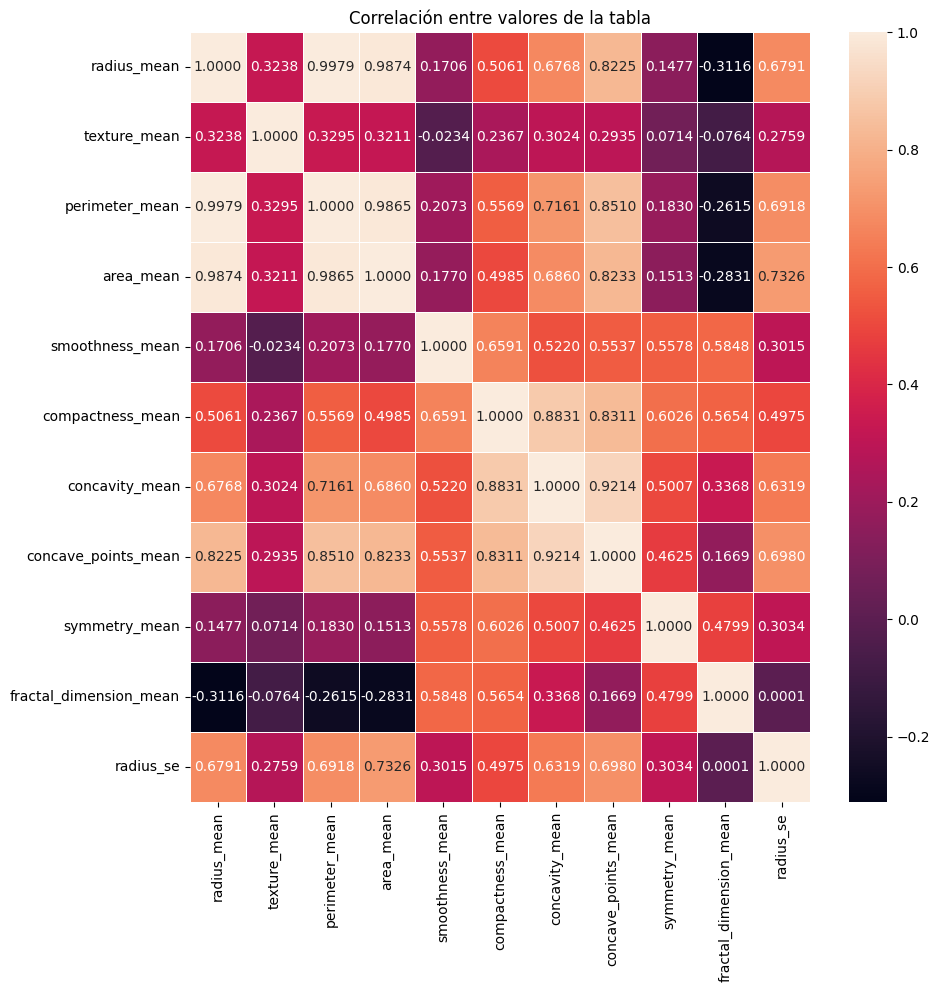

In [ ]:
# Visualizando la Matriz de correlación
f,ax = plt.subplots(figsize=(10, 10))

# trazando el mapa de calor
# corr: dar la matriz de correlación
# cmap: código de color utilizado para trazar
# vmax: da el rango máximo de valores para el gráfico
# vmin: da un rango mínimo de valores para el gráfico
# annot: imprime los valores de correlación en el gráfico
# annot_kws={"size": 12}): Establece el tamaño de fuente de la anotación

sns.heatmap(dfCamTemp.corr(), annot=True, linewidths=.5, fmt= '.4f',ax=ax)
# Colocando un título
plt.title('Correlación entre valores de la tabla')
plt.show()

Veo que hay fuertes correlaciones entre el radio, el area y el perimetro, esto se debe a que el radio se usa en la formula para calcular cada uno de ellos. area = π(radius)² & perimeter = 2π(radius).

In [ ]:
#Cambio los valores categoricos del diagnosis por 0 y 1. 0 representando los valores benignos y 1 los malignos para
#incluirlos en el correlaciograma
dfCamTemp["diagnosis"].replace("B", 0, inplace=True)
dfCamTemp["diagnosis"].replace("M", 1, inplace=True)

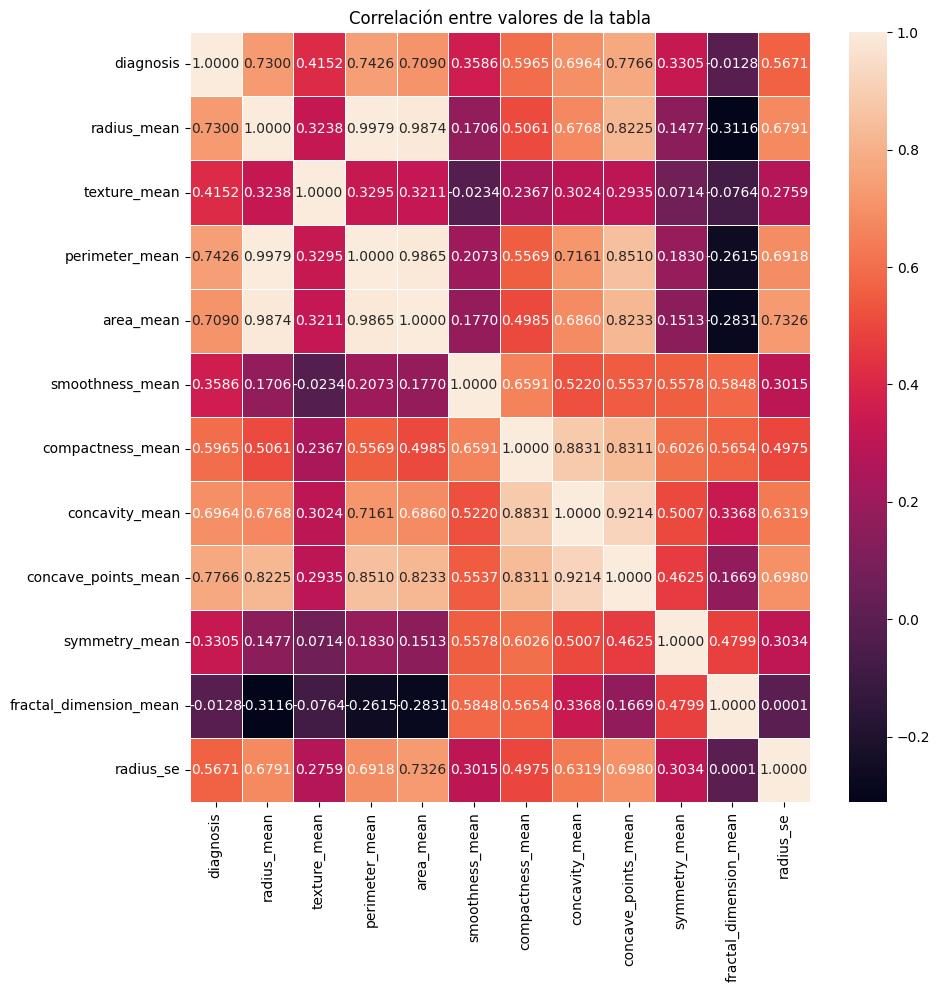

In [ ]:
# Visualizando la Matriz de correlación
f,ax = plt.subplots(figsize=(10, 10))

# trazando el mapa de calor
# corr: dar la matriz de correlación
# cmap: código de color utilizado para trazar
# vmax: da el rango máximo de valores para el gráfico
# vmin: da un rango mínimo de valores para el gráfico
# annot: imprime los valores de correlación en el gráfico
# annot_kws={"size": 12}): Establece el tamaño de fuente de la anotación

sns.heatmap(dfCamTemp.corr(), annot=True, linewidths=.5, fmt= '.4f',ax=ax)
# Colocando un título
plt.title('Correlación entre valores de la tabla')
plt.show()

**Observaciones minimas**

Podemos ver que numericamente el diagnosis esta corelacionado
con el radio, perimetro, area, puntos concavos de manera
positiva y con la dimension fractal de manera negativa.
Esto significa que son las variables que tenemos que vigilar
o que mas importan para la prediccion correcta del diagnositco.
Aun no es posible decir con certeza pero puede ser que la
dimension fractal influye en que entre mas baja mas benigno es
puede ser que el radio entre mas positivo sea mas maligno sea

<img src = "https://media.giphy.com/media/l2Je34w7WkZ84f3os/giphy.gif">

In [ ]:
for i in cat_cols:
    print(dfCam[i].value_counts(normalize = True))

    print('*' * 40)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64
****************************************


In [ ]:
# Media de la variables numéricas agrupadas por el diagnosis
dfCam.groupby(['diagnosis'])[num_cols].mean()

,radius_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


# 3. Creacion y analisis de Modelos
**Construcción de modelos**

1. Preparar los datos para el modelado.
2. Divida los datos en conjuntos de entrenamiento y prueba.
3. Construya el modelo sobre los datos de entrenamiento.
4. Ajuste el modelo si es necesario.
5. Pruebe los datos en el en el conjunto de prueba.

Antes de empezar con los modelos, tenemos que transformar nuestra columna de diagnosis, ya que la columna de diagnosis sigue siendo un objeto y vienen con caracteres. Lo que haremos es sustituir los valores categoricos del diagnosis por 0 y 1. 0 representando los valores benignos y 1 los malignos como lo hicimos con el dataframe temporal **"dfCamTemp"**

In [ ]:
dfCam["diagnosis"].replace("B", 0, inplace=True)
dfCam["diagnosis"].replace("M", 1, inplace=True)


In [ ]:
# Usaremos el Factor de Inflación de la Varianza (VIF), para comprobar si existe multicolinealidad en los datos.

# Un factor de inflación de varianza (VIF) proporciona una medida de multicolinealidad entre las variables
# independientes en un modelo de regresión múltiple.

# La detección de la multicolinealidad es importante porque, si bien la multicolinealidad no reduce el poder
# explicativo del modelo, sí reduce la significancia estadística de las variables independientes.

# Un VIF grande en una variable independiente indica una relación altamente colineal con otras variables que se
# deben considerar o corregir en el diseño del modelo y la selección de variables independientes.

# VIF igual a 1, las variables no están correlacionadas
# VIF entre 1 y 5, las variables están moderadamente correlacionadas
# VIF mayor que 5, las variables están altamente correlacionadas



# Revisar la varianza
def checking_vif(datos):
    vif = pd.DataFrame()
    vif["feature"] = datos.columns

    # Calculando VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(datos.values, i) for i in range(len(datos.columns))
    ]
    return vif

print(checking_vif(dfCam))

                    feature           VIF
0                 diagnosis      6.781264
1               radius_mean  63787.228031
2              texture_mean    251.122570
3            perimeter_mean  58217.307016
4                 area_mean   1305.508785
5           smoothness_mean    393.410071
6          compactness_mean    201.524726
7            concavity_mean    158.130682
8       concave_points_mean    154.891431
9             symmetry_mean    184.542087
10   fractal_dimension_mean    654.870560
11                radius_se    237.352381
12               texture_se     24.675389
13             perimeter_se    211.429834
14                  area_se     72.669276
15            smoothness_se     26.395387
16           compactness_se     44.979263
17             concavity_se     33.676991
18        concave_points_se     54.072023
19              symmetry_se     37.194742
20     fractal_dimension_se     27.556836
21             radius_worst   9960.892269
22            texture_worst    343

In [ ]:
dfCam

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Modelo 1 "**Regresión logística**"

El modelo de regresion logista se usa para predecir la probabilidad de ocurrencia de un evento, es decir para problemas como el nuestro, problemas de clasificacion.
La salida del modelo es un valor de probabilidad entre 0 y 1. La salida representa la probabilidad de que la clase de los datos de entrada sea 1.

La entrada es asignada valores entre 0 y 1 por la funcion sigmoide(funcion logistica). La ecuacion que utiliza es la siguiente:
$\sigma(z)=\frac{1}{1+e^{-z}}$

El valor de $z$ en la función sigmoide representa la suma ponderada de los valores de entrada y se puede expresar con la siguiente ecuación:
$z=\theta^{T}x$

En pocas palabras si la salida de la regresion esta cerca del 0, significa que es menos probable que ocurra el evento. Si esta cerca del 1 significa que es mas probable que ocurra el evento.

### Primer Intento de Regresion Logistica

In [ ]:
# Selecciona variables independientes y variable dependiente
Y1_M1 = dfCam.diagnosis
X1_M1 = dfCam.drop(columns = ['diagnosis'])

In [ ]:
# Divide conjunto de datos
X1M1_train, X1M1_test, Y1M1_train, Y1M1_test = train_test_split(X1_M1, Y1_M1, test_size = 0.20, random_state = 42)


In [ ]:
# Crea objeto de regresión logística
log_reg_M1 = LogisticRegression()

In [ ]:
X1M1_train.shape

(455, 30)

In [ ]:
Y1M1_train.shape

(455,)

In [ ]:
# Ajusta modelo de regresión logística
log_reg_M1.fit(X1M1_train, Y1M1_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [ ]:
# Predice valores de variable dependiente
y_predict_M1 = log_reg_M1.predict(X1M1_test)

In [ ]:
# Calcula matriz de confusión
cm_M1 = confusion_matrix(Y1M1_test, y_predict_M1)
cm_M1

array([[70,  1],
       [ 3, 40]])

La matriz de confusion representa los resultados de prediccion en un problema de clasificacion. El numero de predicciones correctas e incorrectas se resume con los valores de conteo y se descomponen por cada categoria.

Text(0.5, 23.52222222222222, 'Categoría predicha')

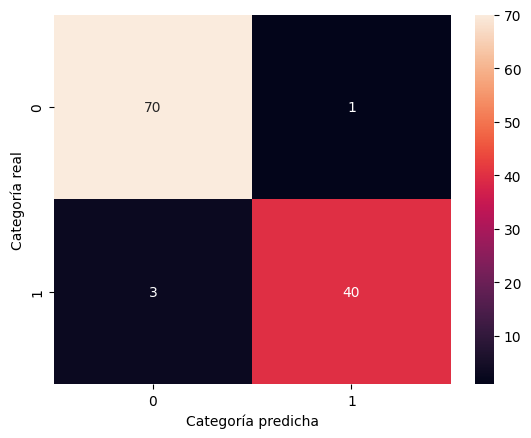

In [ ]:
# Grafica matriz de confusión
cats = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(cats))
plt.xticks(tick_marks, cats)
plt.yticks(tick_marks, cats)
sns.heatmap(pd.DataFrame(cm_M1), annot = True)
plt.ylabel("Categoría real")
plt.xlabel("Categoría predicha")

La matriz de confusión muestra los errores que fue cometiendo el modelo cuando hace predicciones brindadndo información, pero no se detiene en los errores si no que tambien, **los tipos de errores que está cometiendo.**

Los tipos de errores en la predicción de variables con dos categorías son los siguientes:

* **Verdadero positivo (VP)**

Interpretación: Predijo positivo y es cierto.

Ejemplo: Predijo que una gato está en la caja cuando en realidad lo está.

* **Verdadero negativo (VN)**

Interpretación: Predijo negativo y es cierto.

Ejemplo: Predijo que una gato no está en la caja cuando en realidad no lo está.

* **Falso positivo (FP) (Error tipo 1)**

Interpretación: Predijo positivo y es falso.

Ejemplo: Predijo que una gato está en la caja cuando en realidad no lo está.

* **Falso negativo (FN) (Error tipo 2)**

Interpretación: Predijo negativo y es falso.

Ejemplo: Predijo que una gato no está en la caja cuando en realidad lo está.

<img src = "https://media.giphy.com/media/10SAlsUFbyl5Dy/giphy.gif">

In [ ]:
# Calcula métricas de calidad
print("Accuracy:", accuracy_score(Y1M1_test, y_predict_M1))
print("Precisión:", precision_score(Y1M1_test, y_predict_M1))
print("Recall:", recall_score(Y1M1_test, y_predict_M1))
print("F1-score:", f1_score(Y1M1_test, y_predict_M1))


**¿Que significa el Accuaracy, Precision, Recall, F1-Score?**
* **Accuracy**

**El accuracy es la relación entre las observaciones correctamente clasificadas y todas las observaciones clasificadas.**

En el caso ejemplo, la presición respondería a la pregunta: ¿cuántas muestras clasificamos correctamente?

$\frac{VP+VN}{VP+FP+VN+FN}$

Numerador: Muestras clasificadas correctamente.

Denominador: Todas las muestras clasificadas.
* **Precisión**

**La precisión es la relación entre las observaciones correctamente clasificadas positivas y todas las observaciones clasificadas positivas.**

En el caso ejemplo, la presición respondería a la pregunta: ¿cuántas muestras de los que clasificamos como malignas son realmente malignas?

$\frac{VP}{VP+FP}$

Numerador: Muestras realmente malignas clasificados como malignas.

Denominador: Muestras clasificadas como malignas.
* **Recall (Sensitivity)**

**El recall es la relación entre las observaciones correctamente clasificadas positivas y todas las observaciones realmente positivas.**

En el caso ejemplo, la presición respondería a la pregunta: ¿a cuántas de las muestras realmente malignas las clasificamos como malignas?

$\frac{VP}{VP+FN}$

Numerador: Muestras realmente malignas clasificadas como malignas.

Denominador: Muestras realmente malignas.
* **F1-score**

**El F1-score es la media armónica de la precisión y el recall.**

$\frac{2*Precisión*Recall}{Precisión+Recall}$


**¿Que metrica es mas adecuada?**
Usando la palabra favorita de los que estudian economia : "Depende"
La precision es adecuada cuando tenemos un conjunto o varios de datos simetricos. En resumen "Si el costo de los falsos positivos y los falsos negativos es diferente, entonces el score-F1 es la metrica mas adecuada"
La precicion es cuando queremos estar mas seguros de los verdaderos positivos.
El Recall si la idea de los falsos positivos es de mayor importancia que la de los falsos negativos.
En este caso yo diria que no debemos tolerar ni un tipo de error pero preferria que a las muestras benignas las clasifiquemos como malignas y no clasificar a las malignas como benignas dejando a una persona saludable con cancer.

### Segundo Intento de Regresion Logistica

En este intento usaremos el conjunto temporal que definimos mas atras en el proyecto que solo contiene las columnas de las medias para ver si hay mejora en el modelo

In [ ]:
# Separando las variables independientes de la que se estimará
Y_M2 = dfCamTemp.diagnosis
X_M2 = dfCamTemp.drop(columns = ['diagnosis'])

In [ ]:
# Escalando datos
sc = StandardScaler()

X_scaled_M2 = sc.fit_transform(X_M2)

X_scaled_M2 = pd.DataFrame(X_scaled_M2, columns = X_M2.columns)

In [ ]:
# Dividiendo los datos
x_train_m2, x_test_m2, y_train_m2, y_test_m2 = train_test_split(X_scaled_M2, Y_M2, test_size = 0.3, random_state = 1, stratify = Y_M2)

In [ ]:
def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Maligno', 'Benigno'], yticklabels = ['Maligno', 'Benigno'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

In [ ]:
# Ajustando el modelo
lg_m2 = LogisticRegression()

lg_m2.fit(x_train_m2,y_train_m2)

In [ ]:

y_pred_train_m2 = lg_m2.predict(x_train_m2)

metrics_score(y_train_m2, y_pred_train_m2) # función que definimos anteriormente

In [ ]:
# Verificando con los datos de prueba
y_pred_test_m2 = lg_m2.predict(x_test_m2)
metrics_score(y_test_m2, y_pred_test_m2)

In [ ]:
# Imprimiendo coeficientes de regresión logística
cols_m2 = X_M2.columns

coef_lg_m2 = lg_m2.coef_

pd.DataFrame(coef_lg_m2,columns = cols_m2).T.sort_values(by = 0, ascending = False)

In [ ]:
odds_m2 = np.exp(lg_m2.coef_[0]) # Finding the odds

# Agregar las probabilidades a un DataFrame y ordenar los valores
pd.DataFrame(odds_m2, x_train_m2.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False)

In [ ]:
y_scores_lg_m2 = lg_m2.predict_proba(x_train_m2) # predict_proba gives the probability of each observation belonging to each class


precisions_lg_m2, recalls_lg_m2, thresholds_lg_m2 = precision_recall_curve(y_train_m2, y_scores_lg_m2[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg_m2, precisions_lg_m2[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg_m2, recalls_lg_m2[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

Viendo la grafica de arriba podemos optimizar el modelo viendo la interseccion de la precision y el recall, esto significa que estan equilibradas. Vemos que el valor esta por el 0.4-0.5 entonces probaremos los dos y veremos que tanto mejora.


In [ ]:
optimal_threshold1_m2 = .4

y_pred_train_m2 = lg_m2.predict_proba(x_train_m2)

metrics_score(y_train_m2, y_pred_train_m2[:, 1] > optimal_threshold1_m2)

In [ ]:
optimal_threshold2_m2 = .5

y_pred_test_m2 = lg_m2.predict_proba(x_test_m2)

metrics_score(y_test_m2, y_pred_test_m2[:, 1] > optimal_threshold2_m2)

In [ ]:
y_pred_test_m2

In [ ]:
dfCam.head(3)

Podemos ver que el modelo se hizo mas preciso con solo las medias pero no es exactamente lo que queremos, el mejor modelo termino siendo el primer modelo que hizmos de regresion, dandonos valores de:

* Accuracy: 0.9649122807017544
* Precisión: 0.975609756097561
* Recall: 0.9302325581395349
* F1-score: 0.9523809523809524

Donde nos estaremos fijando principalemnte en la precision.
ahora otro modelo que se acerco fue el segundo antes de los umbrales
ya que teniamos una precision en la clasificacion de malignos del .96 y en el recall un .91.
Lo cual esta muy bien.



## Modelo 2 "**K-Nearest Neighbors (K-NN)**"
K-NN utiliza funciones de los datos de entrenamiento para predecir los valores de los nuevos puntos de datos, lo que significa que se le asignará un valor al nuevo punto de datos en función de su similitud con los puntos de datos del conjunto de entrenamiento.


Los siguientes pasos se realizan en K-NN:

- Seleccione K
- Calcular distancia (Euclidiana, Manhattan, etc.)
- Encuentra los K vecinos más cercanos
- Tomar el voto de la mayoría para las etiquetas

La "K" en el algoritmo K-NN es el número de vecinos más cercanos de los que deseamos tomar el voto. Generalmente, K se toma como un número impar cuando el número de clases es par, para obtener una mayoría de votos. Digamos K=3. En ese caso, haremos un círculo con el nuevo punto de datos como el centro del mismo tamaño que encierre solo los tres puntos de datos más cercanos en el plano.

**Pero antes de construir el modelo, debemos identificar el valor de K que se usará en K-NN. Realizaremos los siguientes pasos para el mismo.**

- Por cada valor de K (de 1 a 15), divida el conjunto de entrenamiento en un nuevo conjunto de entrenamiento y validación (30 veces)
- Escalar los datos de entrenamiento y los datos de validación.
- Tome el promedio del error en estos conjuntos de entrenamiento y validación para cada valor de K
- Grafique el tren promedio frente al error de validación para todas las K
- Elija el K óptimo de la gráfica donde los dos errores son comparables



In [ ]:
# Separando las variables independientes de la que se estimará
Y_KNN = dfCam.diagnosis
X_KNN = dfCam.drop(columns = ['diagnosis'])

In [ ]:
# Escalando datos
sc_KNN = StandardScaler()

X_scaled_KNN = sc.fit_transform(X_KNN)

X_scaled_KNN = pd.DataFrame(X_scaled_KNN, columns = X_KNN.columns)

In [ ]:
# Dividiendo los datos
x_train_KNN, x_test_KNN, y_train_KNN, y_test_KNN = train_test_split(X_scaled_KNN, Y_KNN, test_size = 0.3, random_state = 1, stratify = Y_KNN)

In [ ]:
knn = KNeighborsClassifier()


# Seleccionamos el valor óptimo de K para el cual la tasa de error es menor en los datos de validación
# Recorramos algunos valores de K para determinar el valor óptimo de K

train_error_KNN = []

test_error_KNN = []

knn_many_split = {}

error_df_knn = pd.DataFrame()

features_KNN = X_KNN.columns

for k in range(1, 15):
    train_error_KNN = []

    test_error_KNN = []

    lista_KNN = []

    knn = KNeighborsClassifier(n_neighbors = k)

    for i in range(30):
        x_train_new_KNN, x_val_KNN, y_train_new_KNN, y_val_KNN = train_test_split(x_train_KNN, y_train_KNN, test_size = 0.20)

        # Fitting K-NN on the training data
        knn.fit(x_train_new_KNN, y_train_new_KNN)

        # Calculating error on the training data and the validation data
        train_error_KNN.append(1 - knn.score(x_train_new_KNN, y_train_new_KNN))

        test_error_KNN.append(1 - knn.score(x_val_KNN, y_val_KNN))

    lista_KNN.append(sum(train_error_KNN)/len(train_error_KNN))

    lista_KNN.append(sum(test_error_KNN)/len(test_error_KNN))

    knn_many_split[k] = lista_KNN

knn_many_split

In [ ]:
kltest_KNN = []

vltest_KNN = []

for k, v in knn_many_split.items():
    kltest_KNN.append(k)

    vltest_KNN.append(knn_many_split[k][1])

kltrain_KNN = []

vltrain_KNN = []

for k, v in knn_many_split.items():
    kltrain_KNN.append(k)

    vltrain_KNN.append(knn_many_split[k][0])

# Plotting K vs Error
plt.figure(figsize = (10, 6))

plt.plot(kltest_KNN, vltest_KNN, label = 'test' )

plt.plot(kltrain_KNN, vltrain_KNN, label = 'train')

plt.legend()

plt.show()

Podemos ver que el error de prueba es muy parecido al rededor de K mayor igual a (4 o 6) o en K mayor o igual a 12. Pero Entre mas aumente K mas aumentara el error.
Podemos disminuir el error eligiendo un K en el intervalo de 4 a 6 para asegurarnos.
Agreguemos el parametro de 6 vecinos.

In [ ]:
# K-NN modelo
knn = KNeighborsClassifier(n_neighbors = 6)

In [ ]:
# Ajustando el modelo

knn.fit(x_train_KNN,y_train_KNN)

In [ ]:
# Viendo el desempeño del modelo
y_pred_train_knn = knn.predict(x_train_KNN)

metrics_score(y_train_KNN, y_pred_train_knn)

In [ ]:
# Desempeño con datos de prueba
y_pred_test_knn = knn.predict(x_test_KNN)

metrics_score(y_test_KNN, y_pred_test_knn)

Que bueeen modelo nos salio con los vecinos.
Logramos bajar los falsos positivos a 0-1. El unico problema es que el factor que queremos disminuir y no podemos perdonar es el de Falsos negativos. No podemos permitir calsificar los malignos como benignos.

Usando este modelo veamos si podemos mejorarlos con el uso de GridSearchCV para ajustar los parametros.


**GridSearchCV**

Aun no sabemos con seguirdad que parametro afecto que parte del modelo, ni que datos por lo que tenemos que avanzar al tanteo.
"**Grid Search** es una tecnica de ajuste de modelos que intenta calcular los valores optimos de los hiperparametros."

Los parametros que modificaremos son los siguientes:

- **n_vecinos**

     - Número de vecinos a utilizar.


- **pesos={'uniforme', 'distancia'}**
     - uniforme : pesos uniformes. Todos los puntos en cada vecindario se ponderan por igual.
     - distancia : puntos de peso por el inverso de su distancia. En este caso, los vecinos más cercanos de un punto de consulta tendrán una mayor influencia que los vecinos más alejados.


- **pag**
     - Cuando p = 1, esto es equivalente a usar Manhattan_distance (L1), y Euclidean_distance (L2) se usa para p = 2.

In [ ]:
params_knn = {'n_neighbors': np.arange(2, 15), 'weights': ['uniform', 'distance'], 'p': [1, 2]}

grid_knn = GridSearchCV(estimator = knn, param_grid = params_knn, scoring = 'recall', cv = 10)

model_knn = grid_knn.fit(x_train_KNN,y_train_KNN)

knn_estimator = model_knn.best_estimator_

print(knn_estimator)

In [ ]:
# Ajustando con el mejor juego de parámetros
knn_estimator.fit(x_train_KNN, y_train_KNN)

In [ ]:
y_pred_train_knn_estimator = knn_estimator.predict(x_train_KNN)

metrics_score(y_train_KNN, y_pred_train_knn_estimator)

In [ ]:
y_pred_test_knn_estimator = knn_estimator.predict(x_test_KNN)

metrics_score(y_test_KNN, y_pred_test_knn_estimator)

Despues de un tanteo, prueba y error en los parametro logramos bajar los falsos negativos a un intervalo de 0-6 lo cual esta muy bien. Este modelo es uno de los que reduce mas los Falsos negativos, junto con una iteracion de la regresion logistica.
Lo unico malo es que parece estar sobre ajustado ya que en el primer conjunto de datos (entrenamiento) salen resultados perfectos.
Pero vemos que logramos subir el recall de un 84 a un 91. La precision bajo de 98 a 97 pero no es algo muy perjudicial


### SHAP Library

Usaremos la herramienta de visualizacion SHAP para ver que caracteristicas son las mas importantes para el modelo K-NN con este conjunto de datos.

In [ ]:
# Ajustando SHAP
explainer = sh.Explainer(knn_estimator.predict, x_test_KNN)

# Calculando valores
shap_values = explainer(x_test_KNN)

In [ ]:
sh.plots.bar(shap_values)

Esto es muy interesante, podemos ver que los valores mas importantes son el radius_worst, perimeter_worst, Area_worst y demas. Lo que es interesante es que sean los datos de las columnas _worst y no directamente las medias (_mean). Gracias a esto si es necesario podriamos hacer pruebas con otros modelos modificando el conjunto de datos para que solo contenga las columnas _worst y no los _mean como hicimos en la **regresion logistica.**

## Modelo 3 "**El análisis de componentes principales (PCA)**"


El analisis de componentes principales es una tecnica de reduccion de dimensionalidad lineal que se puede utilizar para extraer informacion de un espacio de alta dimension proyectandola en un subespacio de menor dimension.
El PCA Preserva las partes vitales que tienen mas variacion de los datos y descarta lo no esencial con menos variacion.

Este modelo creo que sera uno de los mejores ya que utiliza una transformacion ortogonal para convertir un conjunto de observaciones de variables continuas posiblemente correlacionadas en un conjunto de valores de variables linealmente no correlacionadas llamdas Componentes principales. En nuestro conjunto por el analisis previamente realizado parece haber variables continuas y correlacionadas.

El PCA tiene dos principales casos de uso:



*   **Visualizacion de datos**
*   **Aceleracion del entrenamiento de un modelo de aprendizaje automatico.**



Divido mi conjunto de datos, X las columnas y Y la columna de diagnosis.

In [ ]:
X_m3_PCA = dfCam.iloc[:,1:]
Y_m3_PCA = dfCam['diagnosis'].copy()
X_m3_PCA.info()
Y_m3_PCA

Ahora divido 30% de mis datos para que conformen los datos de prueba.
El resto los asignare al conjunto de entrenamiento.

In [ ]:
X_m3_PCA_train,  X_m3_PCA_test, Y_m3_PCA_train, Y_m3_PCA_test = train_test_split(X_m3_PCA, Y_m3_PCA, test_size=0.3, random_state = 12)

Ahora tenemos que correr el PCA para modelar un subespacio lineal de los datos, esto lo hace capturando la variabilidad, como esto es sensible, normalizaremos la escala de los datos con el "Standard scaled" con eso unificamos la varianza.

In [ ]:
print(X_m3_PCA_train.var())

In [ ]:
scale_m3_pca = StandardScaler(copy=True, with_mean=True, with_std=True)
scale_m3_pca.fit(X_m3_PCA_train)

X_m3_PCA_train_std = scale_m3_pca.transform(X_m3_PCA_train)
X_m3_PCA_test_std = scale_m3_pca.transform(X_m3_PCA_test)

In [ ]:
print(X_m3_PCA_train_std.var())

Creare 2 objetos de PCA para realizar pruebas y ver con cual mejora.
Al primer objeto le pondre 2 componentes y al segundo le pondre 5 para compararlos.

In [ ]:
#Creo objeto 1
pca1 = PCA(n_components = 2)

In [ ]:
#Aplico PCA1
X_pca1 = pca1.fit_transform(X_m3_PCA_train_std)

In [ ]:
#Calcula varianza explicada por cada componente principal
print(pca1.explained_variance_ratio_)

Podemos observar que el componente principal numero 1 contiene el 44% de la informacion y el componente principal numero 2 contiene el 18%.
Esto significa que se pierde un 36.9% de la informacio.
Es demasiada perdida para seguir adelante, lo que haremos sera visualizar los dos componentes de este PCA1 y evaluar el siguiente PCA2 con mas componentes.

In [ ]:
X_pca1_df = pd.DataFrame(X_pca1)
X_pca1_df.columns = ["PC1","PC2"]
X_pca1_df["diagnosis"] = dfCamOG.diagnosis

In [ ]:
#Grafica de los componentes principales de PCA1
# Grafica componentes principales
ggplot(X_pca1_df) + aes(x="PC1", y="PC2", color="diagnosis") + geom_point()

In [ ]:
#Creo objeto 2
pca2 = PCA(n_components = 5, svd_solver="randomized")

In [ ]:
pca2.fit(X_m3_PCA_train_std)
X_train_std_pca2 = pca2.transform(X_m3_PCA_train_std)
X_test_std_pca2 = pca2.transform(X_m3_PCA_test_std)

El modelo que utilzaremos para este caso es el Support Vector Classifier(SVC) para vigilar la exactitud de nuestro modelo.
Le agregare un 0.9 de C y un 0.07 de gamma para ver que tal nos va.

In [ ]:
SVCmodel_pca2 = SVC(C = 0.9, gamma = 0.07, kernel = 'rbf')
SVCmodel_pca2 = SVCmodel_pca2.fit(X_train_std_pca2, Y_m3_PCA_train)
SVCmodel_pca2.score(X_test_std_pca2, Y_m3_PCA_test)

Podemos ver que el modelo tiene una exactitud del 95.3%, ahora tenemos que validar esta exactitud y ver su despeño

In [ ]:
predicted_pca2 = SVCmodel_pca2.predict(X_test_std_pca2)
matrix_pca2 = confusion_matrix(Y_m3_PCA_test, predicted_pca2)
print(matrix_pca2)

Podemos ver que el conjunto de prueba que consiste del 30% de los datos originales el clasificador pudo detectar todas menos 2 celulas/muestras benignas (VN) mientras que tuvo solo 6 (FN), 58 (VP) en las celulas malignas.
Ahora veamos las metricas del modelo

In [ ]:
report_pca2 = classification_report(Y_m3_PCA_test, predicted_pca2)
print(report_pca2)

El modelo es casi perfecto, el modelo quedo muy bien con valores casi llegando al 1 en el recall y en el precision.


## Modelo 4 "**Análisis Discriminante Lineal (LDA)**"

Nuestro deseo en este proyecto siempre ha sido clasificar celulas entre malignas o benignas. El LDA se usa generalemnte para esto, clasificar patrones entre dos clases, no esta de mas que adicionalmente se puede ampliar para clasificar multiples patrones.

No es necesario separar, escalar y dividir los datos una y otra vez pero me da ansiedad y asi nos quitamos la posibilidad de que se agarren variables de otros modelos, o si lo es necesario puedo dividir en 30-70 los conjuntos, en lugar de 20-80 dependiendo del modelo y ver como afecta a sus metricas.



In [ ]:
# Separando las variables independientes de la que se estimará
Y_LDA = dfCam.diagnosis
X_LDA = dfCam.drop(columns = ['diagnosis'])

In [ ]:
# Escalando datos
sc_LDA = StandardScaler()

X_scaled_LDA = sc.fit_transform(X_LDA)

X_scaled_LDA = pd.DataFrame(X_scaled_LDA, columns = X_LDA.columns)

In [ ]:
# Dividiendo los datos
x_train_LDA, x_test_LDA, y_train_LDA, y_test_LDA = train_test_split(X_scaled_LDA, Y_LDA, test_size = 0.3, random_state = 1, stratify = Y_LDA)

In [ ]:
# Fitting the LDA model
lda = LinearDiscriminantAnalysis()

lda.fit(x_train_LDA, y_train_LDA)

In [ ]:
# Checking model performance of LDA
y_pred_train_lda = lda.predict(x_train_LDA)

metrics_score(y_train_LDA, y_pred_train_lda)

Al igual que K-NN y uno de la regresion-Logistica pudimos alcanzar un recall del 100% en cuanto a las muestras/celulas benignas. La que deseamos es la de las malignas pero este modelo esta en margenes aceptables de 95 para arriba como el de KNN.
Veamos si podemos con lo que conocemos analizar los coeficientes y ver que variables son las que afectan el modelo.

In [ ]:
# Lista d elos nombres de columnas
cols_lda = X_LDA.columns

# Coeficientes del modelo LDA
coef_lda = lda.coef_

# Imprimir coeficientes
pd.DataFrame(coef_lda, columns = cols_lda).T.sort_values(by = 0, ascending = False)

Aun no estoy seguro que significa el _worst, pero una idea es que sea el peor caso posible, vemos que el radius_worst es el que mas afecta de manera positiva al diagnostico y curiosamente la que afecta de manera mas negativa es la media del radio radius_mean.
Tambien podemos ver que el perimetro afecta bastante, que tiene sentido lo que se me hace curioso es ver el area mas abajo pero supongo que hay un error en el calculo, ya que me imagino que las celulas no tienen siempre la forma mas geometrica, por lo que el perimetro se valora mas.

Como en la regresion logistica buscaremos un umbral efectivo para el analisis.

In [ ]:
y_scores_lda = lda.predict_proba(x_train_LDA) # predict_proba gives the probability of each observation belonging to each class

precisions_lda, recalls_lda, thresholds_lda = precision_recall_curve(y_train_LDA, y_scores_lda[:, 1])

# Plotear precisions, recalls, and thresholds
plt.figure(figsize = (10, 5))

plt.plot(thresholds_lda, precisions_lda[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lda, recalls_lda[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

Por mas interesante que este la grafica, podemos ver que el umbral que podemos usar esta entre 0 y 0.2. Intentaremos usar 0.1 y ver que tal le va al modelo

In [ ]:
optimal_threshold_lda = .1

y_pred_train_lda = lda.predict_proba(x_train_LDA)

metrics_score(y_train_LDA, y_pred_train_lda[:,1] > optimal_threshold_lda)

PERO VEAN QUE HERMOSURA.
Ha sido el primer modelo que baja los Falsos Negativos de manera drastica, no es ningun 0 pero ha sido lo mas bajo que hemos llegado.
No solo eso, tenemos un modelo bastante equilibrado, nuestro unico valor afectado o es la precision de los malignos. Estando en 98 a comparasion de todos los 99.
Ahora usemoslo con los de test

In [ ]:
optimal_threshold_lda = .1

y_pred_train_lda = lda.predict_proba(x_test_LDA)

metrics_score(y_test_LDA, y_pred_train_lda[:,1] > optimal_threshold_lda)

El conjunto de pruebas nos ha roto la ilusion, regresamos a donde normalmente hemos llegado. Un FN de 6. Pero en general se alcanzo un balance entre ambas categorias en este modelo, solo que no destaca en nada como los otros modelos.




## Modelo 5 "**Análisis Discriminante Cuadrático (QDA)**"


"El análisis cuadrático discriminante (QDA) es una técnica de clasificación paramétrica probabilística que representa una evolución de LDA para separaciones de clases no lineales. QDA, al igual que LDA, se basa en la hipótesis de que las distribuciones de densidad de probabilidad son normales multivariadas pero, en este caso, la dispersión no es la misma para todas las categorías."

In [ ]:
# Separando las variables independientes de la que se estimará
Y_QDA = dfCam.diagnosis
X_QDA = dfCam.drop(columns = ['diagnosis'])

In [ ]:
# Escalando datos
sc_QDA = StandardScaler()

X_scaled_QDA = sc.fit_transform(X_QDA)

X_scaled_QDA = pd.DataFrame(X_scaled_QDA, columns = X_QDA.columns)

In [ ]:
# Dividiendo los datos
x_train_QDA, x_test_QDA, y_train_QDA, y_test_QDA = train_test_split(X_scaled_QDA, Y_QDA, test_size = 0.3, random_state = 1, stratify = Y_QDA)

In [ ]:
# Ajustando modelo QDA
qda = QuadraticDiscriminantAnalysis()

qda.fit(x_train_QDA, y_train_QDA)

In [ ]:
# Desempeño con datos de entrenamiento
y_pred_train_qda = qda.predict(x_train_QDA)

metrics_score(y_train_QDA, y_pred_train_qda)

In [ ]:
# Desempeño con datos de prueba
y_pred_test_qda = qda.predict(x_test_QDA)

metrics_score(y_test_QDA, y_pred_test_qda)

Este modelo al igual que el anterior LDA es uno balanceado pero no destaca en nada, PERO. SI es mejor que el LDA, aunque sea por muy poquito, es una opcion mas viable si se quiere un balance tanto en los malignos como los benignos.

## Modelo 6 "**Máquinas de vectores de soporte**"


El modelo de MVS o SVM en ingles, es un modelo para problemas de clasificacion como el nuestro, los MVS separan las observaciones de cada categoria encontrando el hiperplano optimo con el mayor margen o sea la distancia perpendicular, en un espacio multidimensional.

Este modelo conocido por su truco de kernel en el manejo de espacios de entrada no lineales que ofrece una precisión muy alta en comparación con otros clasificadores, como la regresión logística.

<image src="https://www.researchgate.net/profile/Joana-Cardoso-Fernandes/publication/343092219/figure/fig1/AS:915659655495680@1595321682060/The-support-vector-machines-SVM-method-the-optimal-hyperplane-separates-the-two.png">

Hay distintos tipos de kernel:

* **Un kernel lineal se puede utilizar como un producto punto dadas dos observaciones.** El producto entre dos vectores es la suma de la multiplicación de cada par de valores de entrada.
* **Un kernel polinomial es una forma más generalizada del núcleo lineal que puede distinguir el espacio de entrada curvo o no lineal.** Este kernel requiere un grado.

* **Un kernel de función de base radial puede mapear un espacio de entrada en un espacio dimensional infinito.** Este kernel utiliza una constante gamma que varía de 0 a 1, y mientras más alto su valor, el modelo se ajustará mejor al conjunto de datos de entrenamiento. (Una constante gamma igual a 1 se considera un buen valor predeterminado.)

In [ ]:
# Separando las variables independientes de la que se estimará
Y_MVS = dfCam.diagnosis
X_MVS = dfCam.drop(columns = ['diagnosis'])

In [ ]:
# Escalando datos
sc_MVS = StandardScaler()

X_scaled_MVS = sc.fit_transform(X_MVS)

X_scaled_MVS = pd.DataFrame(X_scaled_MVS, columns = X_MVS.columns)

In [ ]:
# Dividiendo los datos
x_train_MVS, x_test_MVS, y_train_MVS, y_test_MVS = train_test_split(X_scaled_MVS, Y_MVS, test_size = 0.3, random_state = 1, stratify = Y_MVS)

In [ ]:
# Crea objeto de SVM
svecm = svm.SVC(kernel = "linear")

In [ ]:
# Ajusta modelo SVM
svecm.fit(x_train_MVS, y_train_MVS)

In [ ]:
# Predice valores de variable dependiente
y_predict_MVS = svecm.predict(x_test_MVS)

In [ ]:
# Calcula matriz de confusión
cm_MVS = confusion_matrix(y_test_MVS, y_predict_MVS)
cm_MVS

In [ ]:
# Grafica matriz de confusión
cats = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(cats))
plt.xticks(tick_marks, cats)
plt.yticks(tick_marks, cats)
sns.heatmap(pd.DataFrame(cm_MVS), annot = True)
plt.ylabel("Categoría real")
plt.xlabel("Categoría predicha")


In [ ]:
# Calcula métricas de calidad
print("Accuracy:", accuracy_score(y_test_MVS, y_predict_MVS))
print("Precisión:",precision_score(y_test_MVS, y_predict_MVS))
print("Recall:", recall_score(y_test_MVS, y_predict_MVS))
print("F1-score:", f1_score(y_test_MVS, y_predict_MVS))

Lamentablemente no tuvimos muy buenos resultados, creo que ha sido nuestro peor modelo hasta ahorita, esto puede ser por las dimensiones del kernel pero con este modelo no podemos trabajar, tiene buenos valores pero los anteriores han sido mejores


## Modelo 7 "**Arboles de decision**"


El arbol de decision es un modelo de Machine Learning que tiene una estructura muy similar a un digarama de flujo indicandonos el camino a los resultados deseados donde. un nodo interno representa una función (o variable), la rama representa una regla de decisión y cada nodo hoja representa el resultado.


Un árbol de decisión funciona de la siguiente manera:
1. Selecciona la variable que mejor divide las observaciones utilizando medidas de selección de atributos.
2. Convierte esa varible en un nodo de decisión y divide el conjunto de datos en subconjuntos más pequeños.
3. Inicia la construcción del árbol repitiendo los pasos 1 y 2 recursivamente para cada nuevo nodo hasta que una de las siguientes condiciones coincida:
  * Todas las observaciones pertenecen a la misma categoría de la variable dependiente.
  * No quedan más variables.
  * No hay más observaciones.

Como nuestro conjunto cuenta con unas cuantas columnas veremos si el arbol de decision es un buen modelo.
Sospecho que servira el modelo pero habra un margen de error significante o posible sobre-entrenamiento por el significado de los errores. Pero aun asi comenzemos

In [ ]:
X_m7_tree = dfCam.iloc[:,1:]
Y_m7_tree = dfCam['diagnosis'].copy()

In [ ]:
# Divide conjunto de datos
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_m7_tree, Y_m7_tree, test_size = 0.20, random_state = 42)

In [ ]:
#Creamos objeto Arbol
dtree_m7 = DecisionTreeClassifier()

In [ ]:
#Ajustamos arbol
dtree_m7.fit(X_train_tree,y_train_tree)

In [ ]:
y_predict_tree = dtree_m7.predict(X_test_tree)

In [ ]:
cm_tree = confusion_matrix(y_test_tree,y_predict_tree)
cm_tree

In [ ]:
# Grafica matriz de confusión
cats = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(cats))
plt.xticks(tick_marks, cats)
plt.yticks(tick_marks, cats)
sns.heatmap(pd.DataFrame(cm_tree), annot = True)
plt.ylabel("Categoría real")
plt.xlabel("Categoría predicha")

In [ ]:
#Metricas del arbol
print("Accuracy:", accuracy_score(y_test_tree, y_predict_tree))
print("Precisión:",precision_score(y_test_tree, y_predict_tree))
print("Recall:", recall_score(y_test_tree, y_predict_tree))
print("F1-score:", f1_score(y_test_tree, y_predict_tree))

In [ ]:
num_cols_tree = ['diagnosis','radius_mean','perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
            'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se','texture_se','perimeter_se','area_se',
            'smoothness_se','compactness_se','concavity_se', 'concave_points_se', 'symmetry_se',
            'fractal_dimension_se', 'radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst',
            'compactness_worst','concavity_worst','concave_points_worst','symmetry_worst','fractal_dimension_worst']

In [ ]:
# Grafica árbol de decisión
from io import StringIO
dot_data = StringIO()
export_graphviz(dtree_m7, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = num_cols_tree,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("cancer_decision_tree.png")
Image(graph.create_png())

# 4. Conclusiones

Como estamos tratando con cancer debemos buscar el modelo con menos error pero en caso de tener error buscamos disminuir los Falsos negativos. Ya que estos significan que predijo que una muestra no es maligna cuando en realidad lo es. Esto significa poner en riesgo la vida de una persona y no queremos eso.

Para esto me quedaria con el modelo 1 *Regresion Logistica*, el modelo 3 *PCA* o el Modelo 7 *Arbol de Decision* ya que cumplen con lo que busco por las razones que mencione en las conclusiones de cada uno. Pero en resumen, son buenos modelos para problemas de clasificacion, reducieron bastante los Falsos Negativos (O sea decir que la celula es benigna cuando es maligna) y tienen un buen balance.

Pero siento que uno de los mejores modelos para este tipo de conjunto de datos es el de KNN ya que presento un buen balance ambos casos de diagnostico presentaban buenos valores en las metricas sin enfocarse tanto en uno y es un modelo supervisado de classificacion/regresion.

Una posible mejora para el modelo 1 (RL) seria cortar el conjunto de datos en todos los _worst, o armar uno con las columnas con los coeficientes mas altos que se mostraron.

Una forma de posiblemente conseguir el 100% en algunas metricas para el modelo 3 (PCA) seria lidiar con los outliers, normalizar o escalar un poco los valores en las columnas de _se y _worst, ya que cuentan con valores muy altos.
Si nos queremos enfocar en los casos malignos tendriamos que aumentar la cantidad de los datos o moverle (cucharearle) para buscar esos falsos negativos.

Para el modelo del arbol no se me ocurren muchas mejoras mas que recortar el conjunto como en el modelo 1. Pero estas soluciones que implican modificar el conjunto de datos no siempre son las mas recomendadas.

Con esto terminamos el conjunto de datos de cancer de Mama

<img src = "https://media.giphy.com/media/7e2FSCcFHwRrY7GAMD/giphy.gif">

Ahora que terminamos con el dataframe de cancer podemos celebrar que encontramos modelos optimos para el conjunto, pero... esto aun no termina.
Nos falta visitar las Redes Neuronales, para esto usaremos otro conjunto de datos de Toxicidad Oral Aguda. Repetiremos y usaremos teoria aplicada en la primera parte del proyecto para llegar a buenos resultados en el segundo


#TOXICIDAD


-------------------
## **Problema:**
--------------------
En el campo de la seguridad química y la evaluación de riesgos, es de vital importancia identificar y predecir la toxicidad de los compuestos químicos. En este proyecto, nos enfocamos en utilizar un conjunto de datos sobre la toxicidad oral aguda para entrenar redes neuronales y predecir si un compuesto químico es tóxico o no.

Utilizaremos un dataset desconocido con posibles inconsistencias y datos nulos que tendremos que limpiar pero sobre todo, que contiene información detallada sobre características y resultados de pruebas de toxicidad oral aguda. A través del entrenamiento de nuestras redes neuronales, buscamos identificar los factores clave que contribuyen a la toxicidad y comprender las relaciones entre las características en los descriptores de los compuestos y sus efectos tóxicos.


---------------------------
## **Objetivo:**
----------------------------
Nuestro objetivo principal es desarrollar modelos de aprendizaje automático basados en redes neuronales que puedan aprender patrones y correlaciones a partir de los datos existentes. Estos modelos se utilizarán para realizar predicciones precisas y confiables sobre la toxicidad de los compuestos químicos evaluados, lo que proporcionará información valiosa para la evaluación de riesgos y la toma de decisiones en el ámbito de la seguridad química.

A lo largo de este proyecto, aplicaremos técnicas de preprocesamiento de datos, exploración de características y entrenamiento de redes neuronales. Además, llevaremos a cabo una rigurosa evaluación y validación de los modelos para garantizar su rendimiento y confiabilidad. También exploraremos diferentes arquitecturas y algoritmos de redes neuronales para encontrar el enfoque óptimo para la predicción de toxicidad.

*   Detectar y limpiar anomalias en los datos
*   Emplear una red neuronal
*   Mejorar la red neuronal existente cambiando los parametros de la primera
*   Realizar predicciones
*   Analizar los resultados y las predicciones
*   Generar conclusiones para la toma de decisiones.


---------------------------------
## **Data Description Toxicidad:**
---------------------------------

*   Filas : Compuestos quimicos
*   Columnas : Descriptores
*   Columna de Tox: Es la variable a predecir y es el indice de Toxicidad de los compuestos


---------------------------------
## **Estructura de Notebook:**
---------------------------------

1.   Carga de Archivo y analisis inicial de los datos
2.   Limpieza, armado de hipotesis y normalizacion de variables.
3.   Creacion de redes neuronales
4.   Conclusiones



# 1. Carga de Archivo y analisis inicial de los datos

In [ ]:
# Lee archivo
urlTox = "https://raw.githubusercontent.com/FoxuF/DataSetsMachineLearning/main/DataSets/Toxicidad%20Oral%20Aguda.csv"

dfTox = pd.read_csv(urlTox)


In [ ]:
print(f"DataFrame de Toxicidad Vocal Aguda tiene {dfTox.shape[0]} filas y {dfTox.shape[1]} columnas." )

In [ ]:
dfTox.head()

In [ ]:
dfTox.tail()

In [ ]:
# Grafica histograma para cada variable continua
dfTox.hist(bins=50, figsize=(20,16))

Podemos ver que hay pocas distribuciones normales en algunos descriptores, tambien podemos notar que los datos ya estan normalizados por lo que no hace falta escalarlos o normalizarlos y podemos trabajar directamente con ellos

In [ ]:
# Boxplot e histograma juntos

def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,  # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )  # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )  # Add median to the histogram

In [ ]:
histogram_boxplot(dfTox, "Tox")

Nuestro conjunto de toxicidad cuenta con valores cercanos y con poca asymetria pero continua.
Es posible que podamos clasificar en un futuro las muestras de 2.5 para abajo son no toxicas y para arriba toxica pero como no tenemos mucha informacion del conjunto no podemos saber con certeza la escala que se esta empleando.

In [ ]:
dfTox.info()

Veo que tenemos 10 columnas que son de tipo objeto

In [ ]:
#Busco irregularidades en los datos de las columnas que no entraron como float
print(dfTox['cddd_191'].unique().tolist())

Vemos la palabra "nan" por ahi metida

In [ ]:
print(dfTox['cddd_400'].unique().tolist())

In [ ]:
print(dfTox['cddd_309'].unique().tolist())

Tener columnas que parecen ser numericas y que pandas de las detecte como objeto siempre es un problema ya que se deben limpiar, esto significa que tendremos que buscar, espacios al inicio y al final de los registros, alguna palabra como nan, NA, NaN, NULE o alguna otra anomalia.
Una vez que la detectemos podemos hacer muchas cosas, podemos limpiar la fila, remplazar por la media, moda, mediana y demas.
Lo que significa que....

<img src="https://media.giphy.com/media/xT77Ye9vgKyQ9lqTbq/giphy.gif">

# 2.   Limpieza, armado de hipotesis y normalizacion de variables.

Ok para probar primero hare todas las pruebas de limpieza en una copia para no afectar y tener que cargar el mismo dataset muchas veces.

In [ ]:
dfToxMimic = dfTox.copy()

In [ ]:
dfToxMimic[dfToxMimic.isna().any(axis=1)]

Tenemos 2 opciones, podemos eliminar estas 25 filas para quitarnos la cantidad minima de datos y no afectar el modelo o podemos reemplazar los NaN por la cantidad que mas se repite en esas columnas.
Intentaremos remplazar los datos pero si todo falla nos iremos por la primer opcion

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
#Sacamos el valor que mas se repite en cada columna.
dfToxMimic.mode()

In [ ]:
dfToxMimic['cddd_191'] = dfToxMimic['cddd_191'].fillna(0.5832175)
dfToxMimic['cddd_400'] = dfToxMimic['cddd_400'].fillna(-0.8651056)
dfToxMimic['cddd_309'] = dfToxMimic['cddd_309'].fillna(-0.5668178)
dfToxMimic['cddd_223'] = dfToxMimic['cddd_223'].fillna(-0.044968873)
dfToxMimic['cddd_57'] = dfToxMimic['cddd_57'].fillna(-0.6547825)
dfToxMimic['cddd_457'] = dfToxMimic['cddd_457'].fillna(-0.58416224)
dfToxMimic['cddd_84'] = dfToxMimic['cddd_84'].fillna(0.1020076)
dfToxMimic['cddd_78'] = dfToxMimic['cddd_78'].fillna(-0.31644365)
dfToxMimic['cddd_40'] = dfToxMimic['cddd_40'].fillna(-0.944301)
dfToxMimic['cddd_465'] = dfToxMimic['cddd_465'].fillna(-0.9978294)

dfToxMimic['cddd_398'] = dfToxMimic['cddd_398'].fillna(-0.774383)
dfToxMimic['cddd_426'] = dfToxMimic['cddd_426'].fillna(0.361321)
dfToxMimic['cddd_360'] = dfToxMimic['cddd_360'].fillna(0.673984)
dfToxMimic['cddd_76'] = dfToxMimic['cddd_76'].fillna(-0.853056)
dfToxMimic['cddd_288'] = dfToxMimic['cddd_288'].fillna(0.881018)
dfToxMimic['cddd_208'] = dfToxMimic['cddd_208'].fillna(0.71477)
dfToxMimic['cddd_509'] = dfToxMimic['cddd_509'].fillna(0.721208)
dfToxMimic['cddd_467'] = dfToxMimic['cddd_467'].fillna(0.289983)
dfToxMimic['cddd_219'] = dfToxMimic['cddd_219'].fillna(0.172402)
dfToxMimic['cddd_300'] = dfToxMimic['cddd_300'].fillna(0.498172)
dfToxMimic['cddd_180'] = dfToxMimic['cddd_180'].fillna(-0.037007)
dfToxMimic['cddd_460'] = dfToxMimic['cddd_460'].fillna(0.095723)
dfToxMimic['cddd_266'] = dfToxMimic['cddd_266'].fillna(-0.518424)
dfToxMimic['cddd_298'] = dfToxMimic['cddd_298'].fillna(-0.988242)
dfToxMimic['cddd_282'] = dfToxMimic['cddd_282'].fillna(0.998839	)
dfToxMimic['cddd_376'] = dfToxMimic['cddd_376'].fillna(1.0)
dfToxMimic['Tox'] = dfToxMimic['Tox'].fillna(1.779)

In [ ]:
dfToxMimic.isnull().sum()

In [ ]:
# Calculando el procentaje de datos nulos
def missing(df):
    print (round((df.isnull().sum() * 100/ len(df)),2).sort_values(ascending=False))

missing(dfToxMimic)

Listo logramos conservar la mayor parte del dataframe ahora usaremos la La función get_dummies() de la biblioteca Pandas se puede usar para convertir una variable categórica en variables ficticias/indicadoras

<img src = "https://media.giphy.com/media/QC7UQbxq89MnL9r6AN/giphy.gif">

Ya que terminamos de analizar todas las columnas y filas podemos desactivar la opcion de pandas de mostrar todas las columnas y las filas

In [ ]:
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 15)

In [ ]:
data_tox = dfToxMimic.copy()

In [ ]:
data_tox = data_tox.drop(["cddd_191", "cddd_400", "cddd_309", "cddd_223","cddd_57","cddd_457","cddd_84","cddd_78","cddd_465","cddd_40"], axis = 1)

In [ ]:
data_tox = pd.get_dummies(
    data_tox,
    columns = data_tox.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = True,
)
print(data_tox)

Ahora separaremos nuestras variables en las variables independientes y dependiente


In [ ]:
X_Tox = data_tox.drop(['Tox'], axis = 1)
Y_Tox = data_tox['Tox']

Agregamos una columna de 1 constantes

In [ ]:
X_Tox = sm.add_constant(X_Tox)

In [ ]:
# Dividiendo los datos en entrenamiento y prueba
X_train_Tox, X_test_Tox, y_train_Tox, y_test_Tox = train_test_split(
    X_Tox, Y_Tox, test_size = 0.30, random_state = 1)

### Multicolinealidad

"Usaremos el Factor de Inflación de la Varianza (VIF), para comprobar si existe multicolinealidad en los datos.

Las funciones que tengan una puntuación VIF > 5 se descartarán y se tratarán hasta que todas las funciones tengan una puntuación VIF < 5.

Las columnas que codificamos no le prestamos atención pues darán inf"

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Función para cal cular VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculando VIF
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

print(checking_vif(X_train_Tox))

In [ ]:
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 15)

Podemos ver que cddd_245, cddd_319, cddd_440 y cddd_376 son menores
Las columnas cddd_46, cddd_374  y cddd_161 son muy altos

In [ ]:
X_train_Tox = X_train_Tox.drop('cddd_46',axis = 1)
X_test_Tox = X_test_Tox.drop('cddd_46',axis = 1)

X_train_Tox = X_train_Tox.drop('cddd_374',axis = 1)
X_test_Tox = X_test_Tox.drop('cddd_374',axis = 1)

X_train_Tox = X_train_Tox.drop('cddd_161',axis = 1)
X_test_Tox = X_test_Tox.drop('cddd_161',axis = 1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train_Tox))

# 3.   Creacion de modelos y redes neuronales

Usaremos esta funcion para calcular las metricas de rendimiento de cada modelo que usemos.

In [ ]:
# Desempeño del modelo
def model_pref(olsmodel, x_train, x_test):

    # Predicción del modelo en entrenamiento
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train_Tox

    # Predicción del modelo con datos de prueba
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test_Tox

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    np.sqrt(mean_squared_error(y_pred_train, y_observed_train)),
                    np.sqrt(mean_squared_error(y_pred_test, y_observed_test)),
                ],
                "MAE": [
                    mean_absolute_error(y_pred_train, y_observed_train),
                    mean_absolute_error(y_pred_test, y_observed_test),
                ],

                "r2": [
                    r2_score(y_pred_train, y_observed_train),
                    r2_score(y_pred_test, y_observed_test),
                ],
            }
        )
    )

## Modelo 1. OLS

In [ ]:
# Creando un modelo ORDINARY LEAST SQUARES REGRESSION ver página
# https://www.xlstat.com/en/solutions/features/ordinary-least-squares-regression-ols
model_OLS = sm.OLS(y_train_Tox, X_train_Tox).fit()

# Características del modelo
model_OLS.summary()

In [ ]:
# Viendo el desempeño
model_pref(model_OLS, X_train_Tox, X_test_Tox)

Podemos ver que los datos son muy similares por lo que puede no estar sobreajustado, pero en ambos elk error RMSE estan bien. Esto nos importa ya que en el aprendizaje automático, es extremadamente útil tener un solo número para juzgar el rendimiento de un modelo, ya sea durante el entrenamiento, la validación cruzada o el monitoreo después de la implementación. El error cuadrático medio de la raíz es una de las medidas más utilizadas para esto.

Ahora ajustaremos el modelo Eliminando las variables con valor p > 0.05 del modelo anterior y crearemos el modelo de regresion una vez mas.
Para no borrar tantos datos solo borrare 4 que pasen el valor
En este caso seran cddd_306, cddd_293, cddd_373 y cddd_269

In [ ]:
X_train_Tox_OLS2 = X_train_Tox.drop(["cddd_306", "cddd_293", "cddd_373", "cddd_269"], axis = 1)
X_test_Tox_OLS2 = X_test_Tox.drop(["cddd_306", "cddd_293", "cddd_373", "cddd_269"], axis = 1)

In [ ]:
# Creando el modelo nuevo
model_OLS2 = sm.OLS(y_train_Tox, X_train_Tox_OLS2).fit()

# Resumen del modelo
model_OLS2.summary()

In [ ]:
# Resultados del modelo 2
model_pref(model_OLS2, X_train_Tox_OLS2, X_test_Tox_OLS2)

Podemos ver que se repiten las observaciones que el primer modelo, realmente lo unico que podemos decir es que este es mejor por que le quitamos variables insignificantes, podriamos probar eliminarle todas pero creo que eso derrota el proposito.

### **Comprobando las siguientes suposiciones de regresión lineal**

1. **La media de los residuos debe ser 0**
2. **Sin heterocedasticidad** ver código en https://www.cienciadedatos.net/documentos/pystats07-test-homocedasticidad-heterocedasticidad-python
3. **Linealidad de las variables**
4. **Normalidad de los términos de error**

Comprobamos residuos de las medias, estas deben acercarse a 0

In [ ]:
residuals = model_OLS2.resid

np.mean(residuals)

Podemos ver que si se cumple ya que es muy cercana a 0.

### **2. Comprobar la homoscedasticidad**

- Homocedasticidad: si los residuos se distribuyen simétricamente a lo largo de la línea de regresión, se dice que los datos son homocedásticos.

- Heteroscedasticidad- - Si los residuos no se distribuyen simétricamente a lo largo de la línea de regresión, se dice que los datos son heteroscedásticos. En este caso, los residuos pueden tener forma de embudo o cualquier otra forma no simétrica.

- Usaremos `Prueba Goldfeldquandt` (ver https://www.statology.org/goldfeld-quandt-test-python/) para probar la siguiente hipótesis con alfa = 0.05:

     - Hipótesis nula: Los residuos son homocedásticos
     - Hipótesis alternativa: Los residuos tienen heteroscedásticidad

In [ ]:
name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train_Tox, X_train_Tox_OLS2)

lzip(name, test)

Podemos observar que el p-value (la probabilidad de que no hay effecto o diferencia) sigue cumpliendose  >0.05 por lo que Aun estamos en luz verde y no es afectado o es muy muy poco probable


### **3. Linealidad de las variables**

Establece que las variables predictoras deben tener una relación lineal con la variable dependiente.

Para probar la suposición, trazaremos los residuos y los valores ajustados en un gráfico y nos aseguraremos de que los residuos no formen un patrón fuerte. Deben estar dispersos aleatoria y uniformemente en el eje x.

In [ ]:
# Predicted values
fitted = model_OLS2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "lightblue", lowess = True)

plt.xlabel("Valores ajustados")

plt.ylabel("Residuos")

plt.title("Residuos PLOT")

plt.show()

Es un poco dificil visualizar un patron en la grafica, los valores ajustados y los residuos andan dispersos, por lo tanto se cumple

### **4. Normalidad de los términos de error**
Los residuos deben estar normalmente distribuidos

In [ ]:
# Histograma de residuos
sns.histplot(residuals, kde = True)

Vemos que por el histograma si tienen una distribucion normal muy simetrica

In [ ]:
# Plot q-q de residuos
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

Vemos que tenemos una distribucion normal y casi lineal

### **Aplicar validación cruzada para mejorar el modelo y evaluarlo usando diferentes métricas de evaluación**

Verifiquemos el rendimiento del modelo usando la técnica de validación cruzada de la biblioteca scikit-learn y veamos si el rendimiento en el Train y los datos de prueba es comparable a lo que estamos obteniendo después de la validación cruzada de los datos.

In [ ]:
# Build the regression model and cross-validate
linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, X_train_Tox, y_train_Tox, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train_Tox, y_train_Tox, cv = 10,
                             scoring = 'neg_mean_squared_error')


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

Podemos que el RSquared mejoro bastante, tras aplicarle la validacion cruzada al modelo 2.
Aunque aun tiene bastante error en mi opinion.
Ahora si, viendo esta demostracion de un modelo "tradiciona" vemos que podemos encontrarnos con varias limitantes y errores en este tipo de conjunto de datos, ahora compararemos las redes Neuronales. Veremos que son mas utiles para este tipo de problemas.
Las redes actuan como las redes de nuestro cerebro, una de las computadoras mas potentes de la naturaleza, en estas redes neuronales convolucionales podremos definir capas, neuronas y demas.
Al inicio probaremos con 1 capa normalmente, un numero de neuronas igual al numero de variable. Despues iremos aumentando para ver como afecta a la red.

## Primera Red Neuronal

In [ ]:
data_tox.head()

In [ ]:
xTox_R1 = data_tox.iloc[:,:89].values
xTox_R1.shape

In [ ]:
yTox_R1 = data_tox.iloc[:,88].values
yTox_R1

In [ ]:
X_train_Tox_R1, X_test_Tox_R1, Y_train_Tox_R1, Y_test_Tox_R1 = train_test_split(xTox_R1,yTox_R1, test_size = 0.2, random_state = 0)
X_train_Tox_R1, X_validation_Tox_R1, Y_train_Tox_R1, Y_validation_Tox_R1 = train_test_split(X_train_Tox_R1, Y_train_Tox_R1, test_size = 0.2)

Una nota rapida en cuanto a los paramteros de las redes:

***Epochs:*** Numero de epocas de entrenamiento, en pocas palabras cuantas veces el modelo recorre todo el conjunto de datos de entrenamiento.

***Batch_size:*** Cantidad del lote utilizado durante el entrenamiento.

***verbose:*** Si se muestra o no informacion durante el entrenamiento.


In [ ]:
clf = Sequential()

#Primera Capa usaremos la mitad de la cantidad total de entradas
clf.add(Dense(units = 44,kernel_initializer = "uniform", activation = "relu" , input_dim = 89))
#clf.add(Dropout(p=0.1)) #Capa intermedia para reducir overfitting
#Segunda capa
clf.add(Dense(units = 1,kernel_initializer = "uniform", activation = "relu"))

#Compilador de la RNA
clf.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

clf.fit(X_train_Tox_R1, Y_train_Tox_R1, batch_size = 10, epochs = 100)

In [ ]:
#Predicciones Red 1
y_pred = clf.predict(X_test_Tox_R1)
y_pred

In [ ]:
X_test_Tox_R1

In [420]:
performance1 = clf.evaluate(X_test_Tox_R1, Y_test_Tox_R1)
print('Test loss:', performance1[0])
print('Test accuracy:', performance1[1])

36/36 [==============================] - 0s 1ms/step - loss: -23.7757 - accuracy: 0.0000e+00
Test loss: -23.77565574645996
Test accuracy: 0.0


Esto nos esta diciendo que si el compuesto quimico tiene los valores [0.29010248, -0.15738113, -0.14370582, ...,  0.9992943 , 0.9996934 ,  4.97] en los descriptores tendra una toxicidad de [2.2436476]

No esta mal pero subiermos de capa para ver que tanto mejora

In [ ]:
clf2 = Sequential()
#Primera Capa usaremos la mitad de la cantidad total de entradas
clf2.add(Dense(units = 44,kernel_initializer = "uniform", activation = "relu" , input_dim = 89))
#clf.add(Dropout(p=0.1)) #Capa intermedia para reducir overfitting
#Segunda capa
clf2.add(Dense(units = 44,kernel_initializer = "uniform", activation = "relu"))

#Tercera capa
clf2.add(Dense(units = 44,kernel_initializer = "uniform", activation = "relu"))
#cuarta capa
clf2.add(Dense(units = 1,kernel_initializer = "uniform", activation = "relu"))

#Compilador de la RNA
clf2.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

clf2.fit(X_train_Tox_R1, Y_train_Tox_R1, batch_size = 10, epochs = 100)

Puedo ver que en ambas redes el loss sigue teniendo el mismo valor o uno aproximado, por lo que aumentarle capas no parece afectarle, asi que a las capas intermedias le aumentare las neuronas en un ultimo intento para ver si cambia y de ahi nos pasamos a usar otro tipo de red

In [ ]:
#Predicciones Red 2
y_pred = clf2.predict(X_test_Tox_R1)
y_pred

In [ ]:
X_test_Tox_R1

In [419]:
performance2 = clf2.evaluate(X_test_Tox_R1, Y_test_Tox_R1)
print('Test loss:', performance2[0])
print('Test accuracy:', performance2[1])

36/36 [==============================] - 0s 1ms/step - loss: 39.4813 - accuracy: 0.0000e+00
Test loss: 39.48131561279297
Test accuracy: 0.0


El Loss parece ser similar pero los datos son mas precisos

Le pondre 80 neuronas intermedias casi el mismo numero de entradas que tenemos

In [243]:
clf3 = Sequential()
#Primera Capa usaremos la mitad de la cantidad total de entradas
clf3.add(Dense(units = 24,kernel_initializer = "uniform", activation = "relu" , input_dim = 89))
#clf.add(Dropout(p=0.1)) #Capa intermedia para reducir overfitting
#Segunda capa
clf3.add(Dense(units = 30,kernel_initializer = "uniform", activation = "relu"))
#Tercera capa
clf3.add(Dense(units = 20,kernel_initializer = "uniform", activation = "relu"))
#cuarta capa
clf3.add(Dense(units = 1,kernel_initializer = "uniform", activation = "relu"))

#Compilador de la RNA
clf3.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

clf3.fit(X_train_Tox_R1, Y_train_Tox_R1, batch_size = 10, epochs = 100)

Epoch 1/100
365/365 [==============================] - 1s 2ms/step - loss: -17.8273 - accuracy: 0.0000e+00
Epoch 2/100
365/365 [==============================] - 1s 1ms/step - loss: -23.7104 - accuracy: 0.0000e+00
Epoch 3/100
365/365 [==============================] - 1s 2ms/step - loss: -23.7104 - accuracy: 0.0000e+00
Epoch 4/100
365/365 [==============================] - 1s 2ms/step - loss: -23.7105 - accuracy: 0.0000e+00
Epoch 5/100
365/365 [==============================] - 1s 2ms/step - loss: -23.7104 - accuracy: 0.0000e+00
Epoch 6/100
365/365 [==============================] - 1s 1ms/step - loss: -23.7105 - accuracy: 0.0000e+00
Epoch 7/100
365/365 [==============================] - 1s 1ms/step - loss: -23.7104 - accuracy: 0.0000e+00
Epoch 8/100
365/365 [==============================] - 1s 2ms/step - loss: -23.7104 - accuracy: 0.0000e+00
Epoch 9/100
365/365 [==============================] - 1s 2ms/step - loss: -23.7104 - accuracy: 0.0000e+00
Epoch 10/100
365/365 [===============

In [ ]:
#Predicciones Red 3
y_pred = clf3.predict(X_test_Tox_R1)
y_pred

In [ ]:
X_test_Tox_R1

In [418]:
performance3 = clf3.evaluate(X_test_Tox_R1, Y_test_Tox_R1)
print('Test loss:', performance3[0])
print('Test accuracy:', performance3[1])

36/36 [==============================] - 0s 1ms/step - loss: -23.7823 - accuracy: 0.0000e+00
Test loss: -23.78233528137207
Test accuracy: 0.0


Parece que la red no puede ser mejorada mas, asi que asi la dejaremos. Arroja buenas predicciones con los datos. de hecho es poco probable pero parece que con la tercera iteracion la sobre-entrenamos y perjudicamos levemente los resultados.

## Segunda Red Neuronal

Vimos con la anterior que conseguimos los mejores resultados usando 3 capas por lo que nos guiaremos de eso y solo modificaremos los optimizadores de la red, las neuronas y demas

In [244]:
dataR2 = data_tox.copy()

In [245]:
labels = dataR2['Tox']
features = dataR2.drop(columns=['Tox'])

In [246]:
labels[0:5]

0    4.047
1    2.410
2    3.417
3    3.610
4    3.100
Name: Tox, dtype: float64

In [250]:
features = pd.get_dummies(features)

Separamos nuestros datos en 3 conjuntos diferentes para entrenar y validar los resultados

In [255]:
features_train, features_test, labels_train, labels_test = train_test_split(features,labels,test_size=0.2)
features_train, features_validation, labels_train, labels_validation = train_test_split(features_train,labels_train,test_size=0.2)

In [346]:
#Otro intento de red, red 4
model_Tox_red4 = keras.Sequential([keras.layers.Dense(80, input_shape=(88,)),
                              keras.layers.Dense(5, activation=tf.nn.relu),
                              keras.layers.Dense(8, activation='softmax')])

In [347]:
model_Tox_red4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

Le bajaremos al numero de epocas de entrenamiento solo para ver si efectivamente se sobre-entrenaba la red con tantas epocas

In [348]:
history = model_Tox_red4.fit(features_train, labels_train, epochs = 50, validation_data=(features_validation,labels_validation ))

Epoch 1/50
114/114 [==============================] - 1s 4ms/step - loss: 1.8212 - acc: 2.7435e-04 - val_loss: 1.3814 - val_acc: 0.0011
Epoch 2/50
114/114 [==============================] - 0s 2ms/step - loss: 1.2404 - acc: 0.0000e+00 - val_loss: 1.2170 - val_acc: 0.0011
Epoch 3/50
114/114 [==============================] - 0s 3ms/step - loss: 1.1627 - acc: 0.0000e+00 - val_loss: 1.1708 - val_acc: 0.0011
Epoch 4/50
114/114 [==============================] - 0s 3ms/step - loss: 1.1382 - acc: 0.0000e+00 - val_loss: 1.1656 - val_acc: 0.0011
Epoch 5/50
114/114 [==============================] - 0s 3ms/step - loss: 1.1189 - acc: 0.0000e+00 - val_loss: 1.1826 - val_acc: 0.0000e+00
Epoch 6/50
114/114 [==============================] - 0s 3ms/step - loss: 1.1138 - acc: 0.0000e+00 - val_loss: 1.1405 - val_acc: 0.0011
Epoch 7/50
114/114 [==============================] - 0s 2ms/step - loss: 1.1033 - acc: 0.0000e+00 - val_loss: 1.1436 - val_acc: 0.0011
Epoch 8/50
114/114 [========================

Ahora vemos valore sde loss accuracy mas decentes, mas normales. Es posible que la red no se entrenaba bien por tantas epocas. Ya aprendimos el numero de capas gracias a la primera red y ahora las epocas por esta red acercandonos a la red perfecta

In [349]:
#Predicciones Red 4
prediction_XTox = model_Tox_red4.predict(features_test)
performance4 = model_Tox_red4.evaluate(features_test, labels_test)
print(performance4)


36/36 [==============================] - 0s 2ms/step - loss: 1.1011 - acc: 0.0000e+00
[1.1010547876358032, 0.0]


Podemos ver en la prediccion que tenemos un loss medio cerca de 0, pero un accuaracy muy lejos del 1 por lo que no esta aprendiendo del todo bien

In [350]:
print('Test loss:', performance4[0])
print('Test accuracy:', performance4[1])

Test loss: 1.1010547876358032
Test accuracy: 0.0


In [351]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

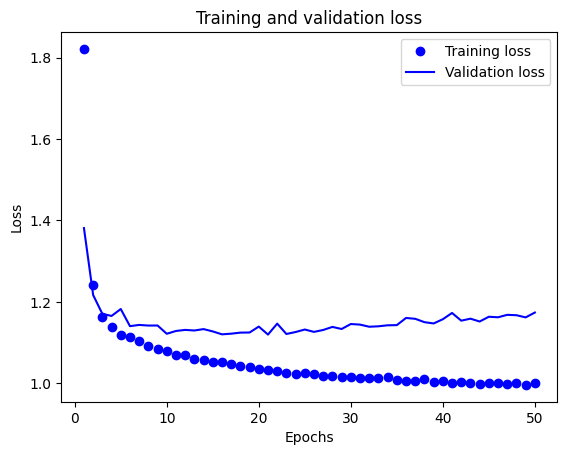

In [352]:
# Checking Overfit
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Viendo la grafica podemos ver que si afecta bastante las epocas por lo que ahora usare otro valor que parece estar equilibrado en ese punto
Que nuestra perdida de validacion toque un minimo y vuelva a subir significa que tenemos un overfit
ambos deben quedarse abajo.

In [394]:
#intento de red 5
model_Tox_red5 = keras.Sequential([keras.layers.Dense(80, input_shape=(88,)),
                              keras.layers.Dense(2, activation=tf.nn.relu),
                              keras.layers.Dense(7, activation=tf.nn.relu),
                              keras.layers.Dense(10, activation='softmax')])

In [395]:
model_Tox_red5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [396]:
history5 = model_Tox_red5.fit(features_train, labels_train, epochs = 50, validation_data=(features_validation,labels_validation ))

Epoch 1/50
114/114 [==============================] - 2s 5ms/step - loss: 2.0323 - acc: 0.0000e+00 - val_loss: 1.6576 - val_acc: 0.0011
Epoch 2/50
114/114 [==============================] - 0s 4ms/step - loss: 1.4571 - acc: 0.0000e+00 - val_loss: 1.3340 - val_acc: 0.0011
Epoch 3/50
114/114 [==============================] - 0s 3ms/step - loss: 1.3079 - acc: 0.0000e+00 - val_loss: 1.3103 - val_acc: 0.0011
Epoch 4/50
114/114 [==============================] - 0s 3ms/step - loss: 1.2929 - acc: 0.0000e+00 - val_loss: 1.2950 - val_acc: 0.0011
Epoch 5/50
114/114 [==============================] - 0s 2ms/step - loss: 1.2837 - acc: 0.0000e+00 - val_loss: 1.2922 - val_acc: 0.0011
Epoch 6/50
114/114 [==============================] - 0s 2ms/step - loss: 1.2751 - acc: 0.0000e+00 - val_loss: 1.2992 - val_acc: 0.0000e+00
Epoch 7/50
114/114 [==============================] - 0s 2ms/step - loss: 1.2685 - acc: 0.0000e+00 - val_loss: 1.2855 - val_acc: 0.0011
Epoch 8/50
114/114 [========================

In [397]:
#Predicciones Red 5
prediction_XTox = model_Tox_red5.predict(features_test)
performance5 = model_Tox_red5.evaluate(features_test, labels_test)
print(performance5)

36/36 [==============================] - 0s 1ms/step - loss: 1.0869 - acc: 0.0000e+00
[1.0868637561798096, 0.0]


In [398]:
print('Test loss:', performance5[0])
print('Test accuracy:', performance5[1])

Test loss: 1.0868637561798096
Test accuracy: 0.0


In [399]:
history_dict = history5.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

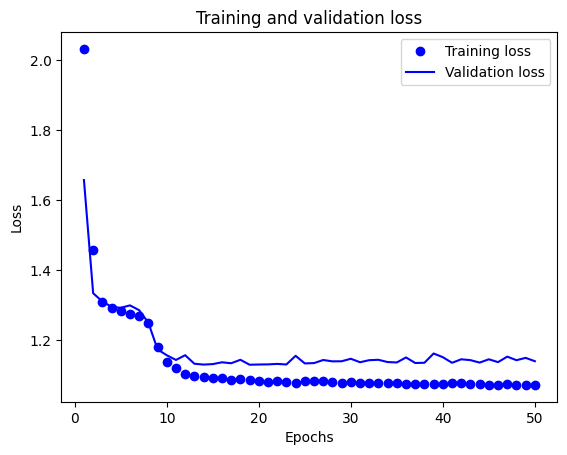

In [400]:
# Checking Overfit
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Podemos ver que al tratar este conjunto de datos como un problema de clasificacion nos encontramos un porcentaje de error muy alto y demasiado overfit El numero de neuronas y capas ayuda mientras no sean demasiadas neuronas en especifico, el uso de capas no parece afectar tanto el overfiting

Por ultimo usaremos otro tipo de red.
Usaremos KerasRegressor.
Para optimizar lo mas posible lo que ya sabemos

## Tercera Red Neuronal

In [401]:
# Usaremos el Factor de Inflación de la Varianza (VIF), para comprobar si existe multicolinealidad en los datos.

# Un factor de inflación de varianza (VIF) proporciona una medida de multicolinealidad entre las variables
# independientes en un modelo de regresión múltiple.

# La detección de la multicolinealidad es importante porque, si bien la multicolinealidad no reduce el poder
# explicativo del modelo, sí reduce la significancia estadística de las variables independientes.

# Un VIF grande en una variable independiente indica una relación altamente colineal con otras variables que se
# deben considerar o corregir en el diseño del modelo y la selección de variables independientes.

# VIF igual a 1, las variables no están correlacionadas
# VIF entre 1 y 5, las variables están moderadamente correlacionadas
# VIF mayor que 5, las variables están altamente correlacionadas

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Revisar la varianza
def checking_vif(datos):
    vif = pd.DataFrame()
    vif["feature"] = datos.columns

    # Calculando VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(datos.values, i) for i in range(len(datos.columns))
    ]
    return vif

print(checking_vif(X_train_Tox))

     feature        VIF
0      const  86.076515
1    cddd_97   7.895736
2   cddd_398   6.901632
3   cddd_245   4.861995
4    cddd_81   5.305358
..       ...        ...
81  cddd_319   3.626683
82  cddd_119  13.589156
83  cddd_440   3.428008
84  cddd_282   8.413685
85  cddd_376   2.996321

[86 rows x 2 columns]


In [402]:
data_tox_red_test = data_tox.copy()

In [403]:
X_train_Tox_R1_Test = X_train_Tox.drop('cddd_119',axis = 1)

X_test_Tox_R1_Test = X_test_Tox.drop('cddd_119',axis = 1)

X_train_Tox_R1_Test = X_train_Tox.drop('cddd_282',axis = 1)

X_test_Tox_R1_Test = X_test_Tox.drop('cddd_282',axis = 1)

In [404]:
data_tox_red_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5697 entries, 0 to 5696
Data columns (total 89 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   cddd_97   5697 non-null   float64
 1   cddd_398  5697 non-null   float64
 2   cddd_245  5697 non-null   float64
 3   cddd_81   5697 non-null   float64
 4   cddd_426  5697 non-null   float64
 5   cddd_360  5697 non-null   float64
 6   cddd_303  5697 non-null   float64
 7   cddd_76   5697 non-null   float64
 8   cddd_16   5697 non-null   float64
 9   cddd_306  5697 non-null   float64
 10  cddd_368  5697 non-null   float64
 11  cddd_325  5697 non-null   float64
 12  cddd_153  5697 non-null   float64
 13  cddd_373  5697 non-null   float64
 14  cddd_466  5697 non-null   float64
 15  cddd_32   5697 non-null   float64
 16  cddd_390  5697 non-null   float64
 17  cddd_288  5697 non-null   float64
 18  cddd_208  5697 non-null   float64
 19  cddd_75   5697 non-null   float64
 20  cddd_427  5697 non-null   floa

In [405]:
# Quitamos los nombres de las columnas
data_tox_red_test = data_tox.values
# Dividimos los datos en variables independientes y variable a estimar
X = data_tox_red_test[:,0:89]
Y = data_tox_red_test[:,88]

In [406]:
X

array([[-0.9659667 ,  0.64650565, -0.67198235, ...,  0.97220325,
        -0.99999803,  4.047     ],
       [-0.41016892, -0.6209921 , -0.27254543, ...,  0.99963164,
         0.9986978 ,  2.41      ],
       [-0.6406335 , -0.09794746, -0.7640846 , ...,  0.99858904,
         1.        ,  3.417     ],
       ...,
       [-0.15022948,  0.35077626, -0.19312416, ...,  0.999728  ,
        -0.9999977 ,  3.219     ],
       [-0.4379261 ,  0.5105468 , -0.26990053, ...,  0.99918604,
        -0.9999998 ,  2.711     ],
       [-0.45657644,  0.5183483 , -0.07706849, ...,  0.9994497 ,
        -0.9999999 ,  3.143     ]])

In [407]:
Y

array([4.047, 2.41 , 3.417, ..., 3.219, 2.711, 3.143])

In [408]:
# define el modelo base
def baseline_model():
    # crea el modelo
    model = Sequential()
    model.add(Dense(89, input_dim=89, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compila el modelo
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# evaluamos el modelo
estimador = KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)

kfold = KFold(n_splits=10)
results = cross_val_score(estimador, X, Y, cv=kfold)
print("Linea Base: %.2f (%.2f) MSE" % (results.mean(), results.std()))

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Linea Base: -0.00 (0.00) MSE


In [417]:
# define el modelo grande
def larger_model():
    # crea el modelo
    model = Sequential()
    model.add(Dense(45, input_dim=89, kernel_initializer='normal', activation='relu'))
    model.add(Dense(15, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compila el modelo
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# evaluamos el modelo
estimador = KerasRegressor(build_fn=larger_model, epochs=50, batch_size=5, verbose=0)

kfold = KFold(n_splits=10)
results = cross_val_score(estimador, X, Y, cv=kfold)
print("Modelo con capa intermedia: %.2f (%.2f) MSE" % (results.mean(), results.std()))

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Modelo con capa intermedia: -0.00 (0.00) MSE


### Ultima Red.

En esta red aplicaremos lo que ya aprendimos para poder armar la ultima red con las caracteristicas positivas de las anteriores, le calcularemos el MSE para evaluarla y observaremos que el Val_loss baje lo mas posible

In [410]:
data_tox

,cddd_97,cddd_398,cddd_245,cddd_81,cddd_426,cddd_360,cddd_303,...,cddd_351,cddd_319,cddd_119,cddd_440,cddd_282,cddd_376,Tox
0,-0.965967,0.646506,-0.671982,-0.671109,-0.503263,0.913493,0.903198,...,-0.105362,0.997838,0.965592,1.000000,0.972203,-0.999998,4.047
1,-0.410169,-0.620992,-0.272545,-0.678317,0.508030,-0.572115,0.462159,...,-0.993308,-0.955019,0.999446,0.987848,0.999632,0.998698,2.410
2,-0.640633,-0.097947,-0.764085,-0.692144,0.201328,0.564599,0.844040,...,-0.985658,-0.963404,0.999272,-0.997007,0.998589,1.000000,3.417
3,0.945360,-0.881241,0.305997,-0.367947,0.045212,0.011929,-0.468636,...,-0.983854,-0.999854,0.997344,0.995375,0.998731,0.992946,3.610
4,0.478588,-0.789002,0.208925,0.038876,-0.716891,0.160726,0.046439,...,-0.954886,-0.999947,0.993631,0.999999,0.998064,-0.980949,3.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5692,-0.491705,0.593388,-0.879167,-0.704719,-0.086650,0.014671,-0.246440,...,-0.978459,0.999954,0.997885,-0.990403,0.998823,1.000000,2.253
5693,0.350866,-0.527312,0.856977,0.153337,-0.945567,-0.406748,-0.500845,...,-0.427016,-0.955883,0.723857,1.000000,0.963173,-1.000000,2.125
5694,-0.150229,0.350776,-0.193124,0.059611,-0.540580,-0.535080,-0.075285,...,-0.991437,-0.968353,0.999034,1.000000,0.999728,-0.999998,3.219
5695,-0.437926,0.510547,-0.269901,-0.057459,-0.620360,-0.202216,0.081664,...,-0.977268,-0.999950,0.997361,1.000000,0.999186,-1.000000,2.711


In [411]:
X_Tox = data_tox.drop(['Tox'], axis = 1)
Y_Tox = data_tox['Tox']

In [412]:
# Dividiendo los datos en entrenamiento y prueba
X_train_Tox, X_test_Tox, y_train_Tox, y_test_Tox = train_test_split(
    X_Tox, Y_Tox, test_size = 0.30, random_state = 1)

In [413]:
# Build the neural network
model = Sequential()
model.add(Dense(15, input_dim=X_Tox.shape[1], activation='relu')) # Hidden 1
model.add(Dense(20, activation='relu')) # Hidden 2
model.add(Dense(5, activation='relu')) # Hidden 3
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3,
                        patience=5, verbose=1, mode='auto',
                        restore_best_weights=True)
model.fit(X_train_Tox,y_train_Tox,validation_data=(X_test_Tox,y_test_Tox),
          callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000
125/125 - 1s - loss: 1.9157 - val_loss: 0.7359 - 1s/epoch - 8ms/step
Epoch 2/1000
125/125 - 0s - loss: 0.6342 - val_loss: 0.6199 - 222ms/epoch - 2ms/step
Epoch 3/1000
125/125 - 0s - loss: 0.5552 - val_loss: 0.5795 - 231ms/epoch - 2ms/step
Epoch 4/1000
125/125 - 0s - loss: 0.5221 - val_loss: 0.5482 - 254ms/epoch - 2ms/step
Epoch 5/1000
125/125 - 0s - loss: 0.4971 - val_loss: 0.5403 - 247ms/epoch - 2ms/step
Epoch 6/1000
125/125 - 0s - loss: 0.4817 - val_loss: 0.5371 - 222ms/epoch - 2ms/step
Epoch 7/1000
125/125 - 0s - loss: 0.4675 - val_loss: 0.5321 - 209ms/epoch - 2ms/step
Epoch 8/1000
125/125 - 0s - loss: 0.4565 - val_loss: 0.5196 - 212ms/epoch - 2ms/step
Epoch 9/1000
125/125 - 0s - loss: 0.4456 - val_loss: 0.5121 - 239ms/epoch - 2ms/step
Epoch 10/1000
125/125 - 0s - loss: 0.4369 - val_loss: 0.5067 - 235ms/epoch - 2ms/step
Epoch 11/1000
125/125 - 0s - loss: 0.4302 - val_loss: 0.4990 - 237ms/epoch - 2ms/step
Epoch 12/1000
125/125 - 0s - loss: 0.4172 - val_loss: 0.5101 - 339

Ahora si tenemos un val loss que disminuye y esto es bueno, veamos otras metricas de este ultimo modelo

**Mean Square Error**
En estadística, el error cuadrático medio (MSE) o la desviación cuadrática media (MSD) de un estimador (de un procedimiento para estimar una cantidad no observada) mide el promedio de los cuadrados de los errores, es decir, la diferencia cuadrática promedio entre la cantidad estimada valores y el valor real.

In [414]:
from sklearn import metrics
# Predict
pred = model.predict(X_test_Tox)

# Measure MSE error.
score = metrics.mean_squared_error(pred,y_test_Tox)
print("Final score (MSE): {}".format(score))

54/54 [==============================] - 0s 1ms/step
Final score (MSE): 0.4782008467049353


Este es un muy buen error, pero este error no nos ayuda mucho, por lo que podemos usar otra maetrica

**Root Mean Square Error** La raíz cuadrada media (RMSE) es esencialmente la raíz cuadrada de la MSE. Debido a esto, el error de RMSE está en las mismas unidades que el resultado de los datos de entrenamiento. Deseamos valores bajos de RMSE.

In [415]:
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test_Tox))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 0.6915206769901644


Parecemos estar 1 unidad alejados del valor de toxicidad que queremos predecir.

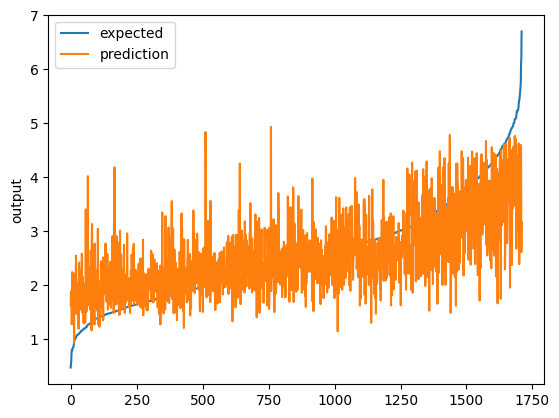

In [416]:
# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.values.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Plot the chart
chart_regression(pred.flatten(),y_test_Tox)

Nuestro modelo esta bien, hay outliers en los valores de toxicidad mas alto ya que no contabamos con muchos datos de toxicidad alta, entonces el modelo pierde precision a esos niveles pero podemos observar que estamos encima de lo esperado contra lo que existe.
Los resultados que debemos esperar de este tipo de grafica es que la linea de la prediccion y la linea de lo esperado deben estar pegadas y lo cumplimos, el 80% esta encima.
El modelo es muy preciso para toxicidades en un rango medio, a la mitad de 0 y 7.
Tiene sentido ya que teniamos una distribucion normal con un cumulo de datos en esos intervalos, como de 3 a 6.
Nota: Los valores en el eje x representa la cantidad de valores en nuestro conjunto de prueba y los de el eje y son los valores de la toxicidad.


# 4.   Conclusiones

<img src="https://media.giphy.com/media/ne3xrYlWtQFtC/giphy.gif">

Efectivamente las redes neuronales sirven para este tipo de conjunto de datos mas que cualquier modelo tradicional.
Podemos ver que El modelo si se beneficia de mas capas pero empieza a sobre-entrenarse con mas de 3-4. Las neuronas apoyan bastante al modelo, estuve viendo y a mi me funciono bastante usar la mitad del total de columnas, en cuanto a epocas me quede en un punto medio de las primeras neuronas, no puse 100 ya que me daban datos muy raros
pero tampoco me fui a los 7-12. Ya que el cambio era muy drastrico.

Las redes Neuronales que usaria para este modelo serian el "Larger_model" o la red en la que sacamos mayor accuracy. Ya que nos asegura predicciones parecidas a el conjunto original

In [ ]:
#Opcional no es necesario ejecutar
%reset

# Referencias


1.   https://scikit-learn.org/stable/
2.   https://pandas.pydata.org/docs/
3.    [Bishop, Christopher M. 2006. Pattern Recognition and Machine Learning (Information Science and Statistics). Secaucus, NJ, USA: Springer-Verlag New York, Inc.](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf)
4.   [James, Gareth, Daniela Witten, Trevor Hastie, and Robert Tibshirani. 2014. An Introduction to Statistical Learning: With Applications in R. Springer Publishing Company, Incorporated.](https://www.statlearning.com)
5. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4111019/#:~:text=The%20P%20value%20is%20defined,groups%20is%20due%20to%20chance.

Agradezco a Sarahi Aguilar y a el Doctor Félix Martínez por sus clases. Mucha de la teoria fue aplicada en este proyecto.
